# Сборный проект. Исследование показателей продаж видеоигр для рекламной кампании 2017-го года для интернет-магазина

## Описание проекта

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Имеются данные до 2016 года, планируется кампания на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

## План работы

###### Шаг 1. Импорт библиотек, открытие файла с данными и изучение общей информации

###### Шаг 2. Подготовка (предобработка) данных.
- 3амена названий столбцов (приведение к нижнему регистру)
- Преобразование данных в нужные типы, описание причин замены
- Обработка пропусков (при необходимости):
    - Объяснение способа заполнения пропусков
    - Описане причин пропусков
    - Изучение аббревиатуры 'tbd' в столбце с оценкой пользователей, разбор, описание обработки
- Подсчет суммарных продаж во всех регионах в отдельной столбце

###### Шаг 3. Исследовательский анализ данных
- Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
- Как менялись продажи по платформам
   -  Выбор платформ с наибольшими суммарными продажами и построение распределения по годам
   - За какой характерный срок появляются новые и исчезают старые платформы?
- Определение данных для прогноза на 2017 год.
- Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ
- Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами. Формулировка выводов.
- Соотнесение выводов с продажами игр на других платформах.
- Оценка общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

###### Шаг 4. Составление портрета пользователя каждого региона
Определение для каждого региона (NA, EU, JP):
- самых популярных платформ (топ-5), описание различий в долях продаж
- самых популярных жанров (топ-5), пояснение разницы
- влияние рейтинга ESRB на продажи в отдельных регионах

###### Шаг 5. Проверка гипотез
- Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задание порогового значения alpha.
Пояснение нулевой и альтернативной гипотез
Объяснение критериев проверки гипотез

###### Шаг 6. Общий вывод и рекомендации

## Шаг 1. Импорт библиотек, открытие файла с данными и изучение общей информации

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import re

### Считывание данных и изучение общей информации

In [2]:
#считываем данные
games = pd.read_csv('/datasets/games.csv')

In [3]:
#посмотрим на первые 10 строк
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#посмотрим общую информацию датасета
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод по шагу 1
- Имеем датасет с 16715 строками и 11 колонками
- Видим, что наименования столбцов выполнены не в соответствии с принятым стилем (с использованием верхнего регистра)
- Отдельные столбцы имеют неверные типы данных ('User_Score' - object, 'Year_of_Release' - float64)
- В столбцах с оценками и рейтингом ESRB очень много пропусков
- Небольшое количество пропусков имеется в столбцах 'Name', 'Genre', 'Year_of_Release'

## Шаг 2. Подготовка (предобработка) данных

### Замена названия столбцов (приведение к нижнему регистру)

In [5]:
games.columns = map(str.lower, games.columns)
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типов данных

Просмотрим какие значения имеются в столбце 'year_of_release' (год релиза игры)

In [6]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Видим, что ошибочных данных нет, можно смело менять тип на целочисленный

In [7]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Просмотрим какие значения имеются в столбце 'user_score' (оценка пользователя)

In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что кроме числовых значений имеется значение "tbd". TBD (to be determined) - подлежит уточнению, т.е. не определено. Смысл такой аббревиатуры аналогичен NaN.

Взглянем на строки, в которых столбец 'user_score' имеет значение 'tbd'

In [9]:
tbd_rows = games[games['user_score'] == 'tbd']
tbd_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Сменим тип данных столбца 'user_score' на числовой. Для избежания ошибок добавим в код обработку ошибок (errors='coerce')

In [10]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Посмотрим на значения столбца 'critic_score', для того чтобы определить необходимость изменения типа данных на целочисленный

In [11]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Оценка критиков не имеет дробной части, можно менять тип данных на целочисленный

P.S. В дальнейшем это привело к ошибке при вычислении корреляций, т.к. столбцы 'user_score' и 'critic_score' имели разные типы данных. Поэтому столбец 'critic_score' я оставил в формате float64 (в ячейке ниже эта строка кода закомментирована)

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

In [12]:
#games['critic_score'] = games['critic_score'].astype('Int64')

#посмотрим на общую информацию датафрейма
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Работа с пропусками

In [13]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

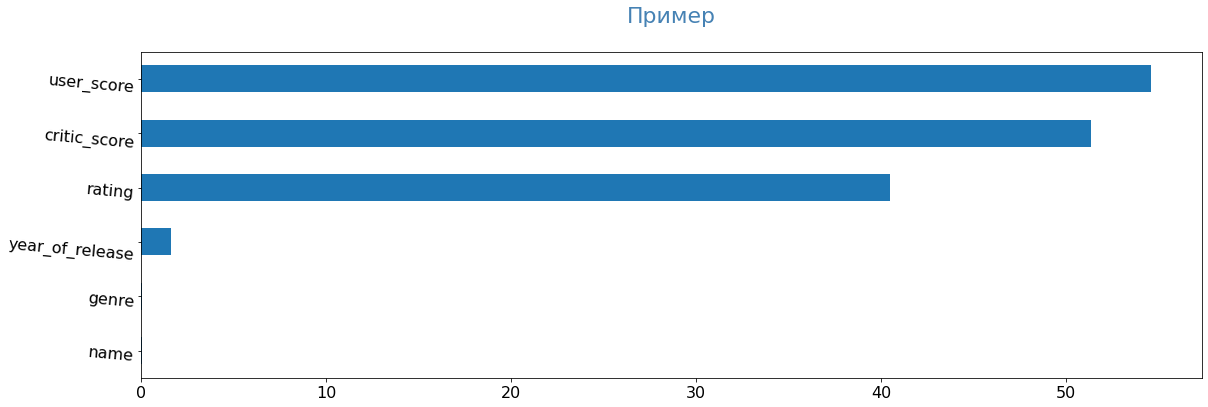

In [14]:
pass_value_barh(games)

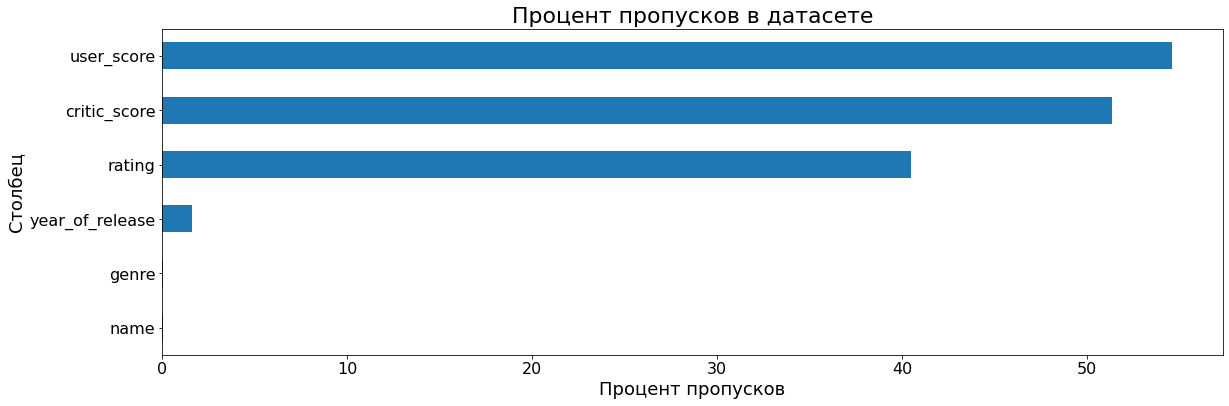

In [15]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'Процент пропусков'})
            .query('`Процент пропусков` > 0')
            .sort_values(by = 'Процент пропусков', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропусков в датасете', fontsize = 22, color = 'black')
        )
        plt.xlabel('Процент пропусков', fontsize=18)
        plt.ylabel('Столбец', fontsize=18)           
        plt.show()
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

pass_value_barh(games)

Посмотрим на те две строки, в которых нет наименования

In [16]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что в этих двух строках мало информации о играх
- нет наименования
- не указан жанр
- нет сведений об отзывах и оценке критиков
- нет сведений об ESRB-рейтинге
- игры выходили в 1993 году

Количество строк минимально, игры вышли в 1993 году. Эти строки можно удалить, т.к. они никак не влияют на исследовании для рекламной кампании 2017-го года

In [17]:
games.dropna(subset=['name'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Посмотрим на те строки, в которых не указан год выпуска

In [18]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Отсутствие года в  можно заполнить следующим способом:
- ищем строки с пропуском в столбце 'year_of_release'
- если имеется в названии игры четырехзначное число, то заполняем этим числом год релиза игры (например, FIFA Soccer 2004, Madden NFL 2004)
- проводим проверку

P.S. Возможна следующая неточность. Часто в играх в названии указывается следующий год. Так, например, в спортивных симуляторах игра выходит перед сезоном, т.е. игра FIFA Soccer 2004 вышла в 2003-м году перед футбольным сезоном-2004, который начинается в 2003-м году. Тем не менее данная возможная неточность не повлияет на результаты исследования, т.к. в дальнейшем мы будем брать период нескольких лет

In [19]:
# Создаем функцию для заполнения пропусков в столбце 'year_of_release'
def fill_year_of_release(row):
    # Проверяем, если значение является пропуском, а в 'name' есть четырехзначное число
    if pd.isnull(row['year_of_release']) and re.search(r'\b\d{4}\b', str(row['name'])):
        # Находим четырехзначное число в строке и преобразуем его в целое число
        year = int(re.search(r'\b\d{4}\b', str(row['name'])).group())
        return year
    else:
        return row['year_of_release']

# Применяем функцию
games['year_of_release'] = games.apply(fill_year_of_release, axis=1)

In [20]:
#делаем проверку
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983, <NA>], dtype=object)

Столбец 'year_of_release' вновь стал типом 'object'. Снова изменим тип данных на целочисленный

In [21]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Выполним заполнение пропусков в столбце 'rating'

In [22]:
#посмотрим на уникальные значения столбца
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
games['rating'] = games['rating'].fillna('N/A')

#посмотрим на общую информацию датафрейма
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Пропуски заполнены (там где было возможно). Можно переходить к подсчету продаж во всех регионах

### Поиск дубликатов

In [24]:
#посчитаем простые дубликаты
games.duplicated().sum()

0

Простых дубликатов нет. Теперь поищем дубликаты в ключевых колонках: 'name', 'platform', 'year_of_release'

In [25]:
key_columns = ['name', 'platform', 'year_of_release']
duplicates = games.duplicated(subset=key_columns).sum()
duplicates

1

Видим, что есть один дубликат. Посмотрим его

In [26]:
key_duplicates_mask = games.duplicated(subset=key_columns, keep=False)
key_duplicates_df = games[key_duplicates_mask].sort_values(by=key_columns)
key_duplicates_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим дубликат

In [27]:
games.drop_duplicates(subset=key_columns, inplace=True)

In [28]:
#проверка
games.duplicated(subset=key_columns).sum()

0

Дубликаты удалены. Перед переходом к подсчету продаж, еще раз взглянем на общую информацию и первые 10 строк датафрейма

In [29]:
display(games.head(10))
display(games.info(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,N/A
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,N/A


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16460 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

### Подсчет суммарных продаж во всех регионах в отдельном столбце

In [30]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(games.head(10))
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,N/A,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,N/A,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16460 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


None

###### Изучение причин пропусков в столбцах 'critic_score', 'user_score'

Возможно игры без оценок пользователей, критиков выпущены давно, когда еще отзывы и оценка критиков не сохранились (не публиковались). Проверим это. Узнаем минимальный год, максимальный, платформы

In [31]:
no_critic_game = games[games['critic_score'].isnull()].copy()
display(no_critic_game['year_of_release'].unique())
display(no_critic_game['year_of_release'].min())
display(no_critic_game['year_of_release'].max())
display(no_critic_game['platform'].unique())

<IntegerArray>
[1985, 1996, 1989, 1984, 2005, 1999, 1990, 2006, 1988, 2002, 2010, 1998, 2015,
 2013, 2009, 2014, 1992, 1993, 2004, 1994, 1997, 2012, 2007, 1982, 2016, 2003,
 2011, 1986, 2000, 2001, 1995, 2008, 1991, 1981, 1987, 1980, 1983, <NA>]
Length: 38, dtype: Int64

1980

2016

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [32]:
no_user_score_game = games[games['user_score'].isnull()].copy()
display(no_user_score_game['year_of_release'].unique())
display(no_user_score_game['year_of_release'].min())
display(no_user_score_game['year_of_release'].max())
display(no_user_score_game['platform'].unique())

<IntegerArray>
[1985, 1996, 1989, 1984, 2005, 1999, 1990, 2006, 1988, 2002, 2010, 1998, 2015,
 2013, 2009, 2014, 1992, 1993, 2004, 1994, 1997, 2012, 2007, 1982, 2016, 2003,
 2011, 1986, 2000, 2001, 1995, 2008, 1991, 1981, 1987, 1980, 1983, <NA>]
Length: 38, dtype: Int64

1980

2016

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Закономерностей не найдено. Игры с пропусками в перечисленных столбцах:
- выпускались на множестве платформ
- выпускались с 1980 по 2016 год

Возможно они банально непопулярны. Сделаем такую проверку. Посмотрим на топ-50 игр по продажам

In [33]:
games.nlargest(50, 'total_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,N/A,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,N/A,28.31


Среди данного списка множество игр без оценок пользователей, без оценок критиков. Не наблюдается никакой закономерности отсутствия этих данных.
Таким образом, причина пропусков в данных заключается в том, что информация оценок критиков, оценок пользователей не была заполнена во время составления датафрейма, возможно, из-за отсутствия доступных данных или упущений в процессе сбора информации.

Это же можно сказать о пропусках в столбце 'year_of_release'

### Вывод по шагу 2
- изменили тип данных в столбцах 'year_of_release', 'user_score' на целочисленный и число с плавающей точкой (float64) соответственно
- избавились от аббревиатуры 'tbd' в столбце 'user_score', теперь как положено вместо текста 'tbd' пустое значение (NaN)
- частично заполнили пропуски в столбце 'year' (там где год указан в названии игры)
- заполнили пропуски в столбце 'rating' текстом 'N/A', тип данных object позволяет это сделать
- проверили и удалили дубликаты
- причина пропусков: информация не была заполнена во время составления датафрейма, возможно, из-за отсутствия доступных данных или упущений в процессе сбора информации
- не стали заполнять пропуски в столбцах 'user_score', 'critic_score', т.к. нет каких-либо закономерностей и связей с другими стобцами. Оценка пользователей, критиков не зависит от данных других столбцов
- посчитали суммарные продажи во всех регионах в отдельном столбце

## Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

Посмотрим сколько игр выпускалось в различные годы. Составим список и график

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     830
2003     779
2004     764
2005     941
2006    1008
2007    1198
2008    1429
2009    1427
2010    1255
2011    1137
2012     652
2013     545
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

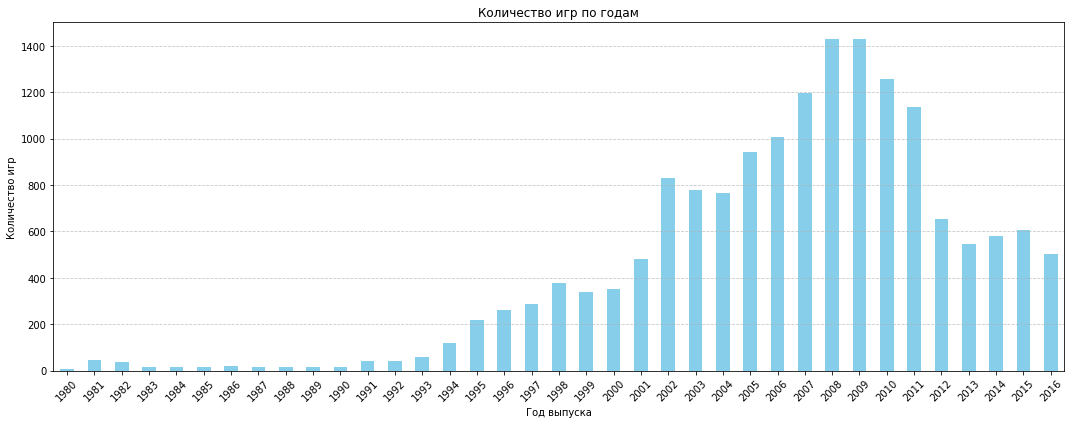

In [34]:
games_per_year = games['year_of_release'].value_counts().sort_index()
display(games_per_year)
# Строим график
plt.figure(figsize=(15, 6))  # Задаем размер графика
games_per_year.plot(kind='bar', color='skyblue')  # Строим гистограмму
plt.title('Количество игр по годам')  # Заголовок графика
plt.xlabel('Год выпуска')  # Подпись оси x
plt.ylabel('Количество игр')  # Подпись оси y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Включаем сетку на графике
plt.xticks(rotation=45)  # Поворачиваем подписи по оси x на 45 градусов для удобства чтения
plt.tight_layout()  # Автоматическое выравнивание элементов графика
plt.show()  # Показываем график

Видим, что количество выпущенных игр резко росло в 90-е и 2000-е годы, но после 2009 года количество выпущенных игр резко уменьшилось и колеблется в районе 600 штук

Для ответа на вопрос о важности данных за все периоды нужно понимать какие актуальные платформы существуют в 2016 году? Как долго они будут актуальны?

In [35]:
games.query('year_of_release == 2016')['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

Мы получили спискок платформ, на которые вышли игры в 2016 году: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii. Теперь узнаем, когда начали выпускать игры на перечисленные платформы

In [36]:
# Группируем данные по платформе и находим минимальный год выпуска для каждой платформы
first_release_years = games.groupby('platform')['year_of_release'].min()

# Выводим результаты
first_release_years.loc[['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']]

platform
PS4     2013
3DS     2011
XOne    2013
WiiU    2012
PS3     2006
PC      1985
X360    2005
PSV     2011
Wii     2006
Name: year_of_release, dtype: Int64

Мы получили спискок платформ и теперь знаем, когда на соответствующие платформы начали выпускать игры. За исключением PC, видим, что наиболее ранний год - 2005-й (X360) и 2006-й (PS3, Wii). Теперь мы точно знаем, что не стоит рассматривать игры до 2005 года. Далее мы попробуем сузить период выпуска игр, анализуя срок жизни платформы

### Как менялись продажи по платформам
- Выбор платформ с наибольшими суммарными продажами и построение распределения по годам
- За какой характерный срок появляются новые и исчезают старые платформы?

###### Выбор платформ с наибольшими суммарными продажами и построение распределения по годам

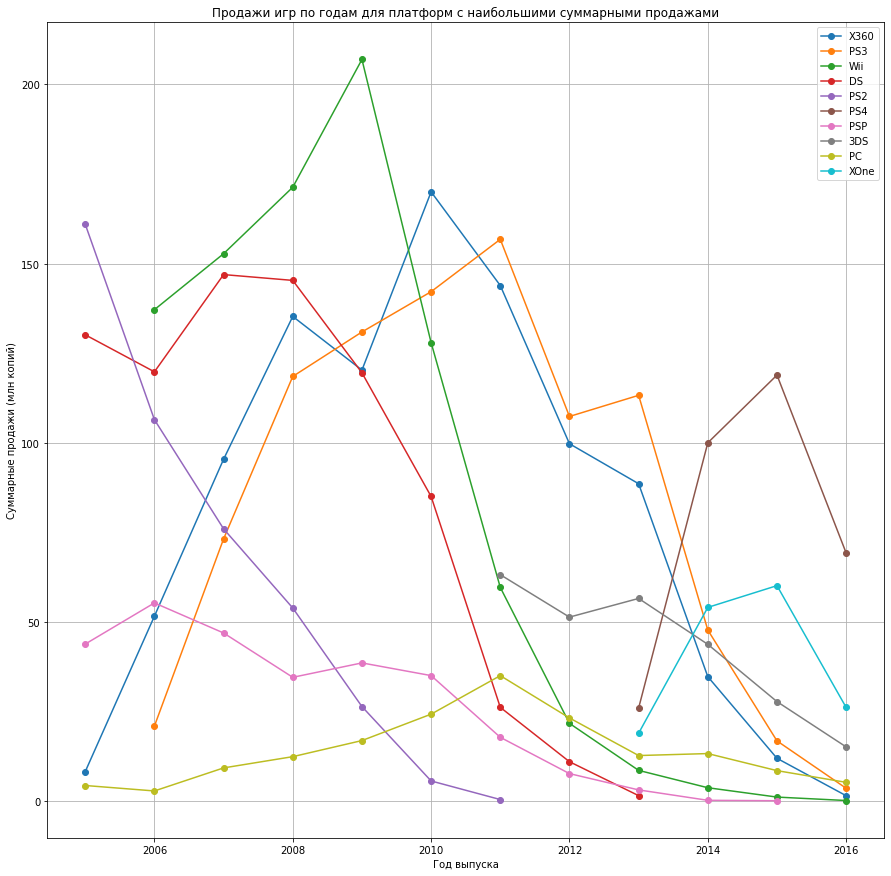

In [37]:
# Выберем платформы с наибольшими суммарными продажами с 2005 года
top_platforms = games[games['year_of_release'] > 2004].groupby('platform')['total_sales'].sum().nlargest(10).index

# Отфильтруем данные только для выбранных платформ
top_platforms_data = games[games['platform'].isin(top_platforms)]

# Построим распределение по годам для каждой из выбранных платформ
plt.figure(figsize=(15, 15))
for platform in top_platforms:
    platform_sales = games[(games['platform'] == platform) & (games['year_of_release'] >= 2005)]
    platform_sales.groupby('year_of_release')['total_sales'].sum().plot(label=platform, marker='o', linestyle='-')
plt.title('Продажи игр по годам для платформ с наибольшими суммарными продажами')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

На графике видно, что популярность игр для PS3, Wii, X360 падает. Эти платформы стоит рассматривать для кампании 2017-го года очень осторожно. Таким образом мы еще сузим период выхода игр.
Ранее мы определили "живые" платформы:
- PS4
- 3DS
- XOne
- WiiU
- PS3
- PC
- X360
- PSV
- Wii

Смотрим на наш график и видим, что самые "живые" - это XOne, PS4, 3DS. Достаточно ровную линию на графике имеют PC-игры, платформу PC тоже можно рассматривать в дальнейшей аналитике. В аналитике не стоит брать период ранее 2011-го года (период самой ранней продажи для перечисленных платформ, за тисключением "вечной" жизни PC)

###### За какой характерный срок появляются новые и исчезают старые платформы? Определение актуального периода

Попробуем определить срок жизни платформы. Определим средний и медианный срок продаж

In [38]:
# Определяем срок жизни платформы на основе продаж
platform_lifetimes = games.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Находим год последних продаж для каждой платформы
platform_last_years = games.groupby('platform')['year_of_release'].max()

# Объединяем данные о первом и последнем годе продаж для каждой платформы
platform_lifetimes['last_year'] = platform_last_years

# Вычисляем срок жизни платформы по продажам
platform_lifetimes['lifetime'] = platform_lifetimes['last_year'] - platform_lifetimes['min']

# Удаляем ненужные столбцы
platform_lifetimes.drop(columns=['min', 'max', 'last_year'], inplace=True)

# Выводим результаты
display(platform_lifetimes)
display(platform_lifetimes.mean())
display(platform_lifetimes.median())



,lifetime
platform,
2600,9
3DO,1
3DS,5
DC,10
DS,28
GB,13
GBA,7
GC,6
GEN,4


lifetime    7.612903
dtype: float64

lifetime    6.0
dtype: float64

Получили, что средний срок жизни составляет 7.6 лет, медианный - 6 лет. Тем не менее по крупным платформам видим, что срок жизни нередко превышает 10 лет (PS2, PS3, Wii, X360). Учитывая эти сроки, медианные и средние значения, рассматривать платформы, которые на рынке более 6 лет, стоит осторожно. Пока основными являются  платформы PS4 и XOne, а это значит что актуальный период - это 2013-2016 гг. Но учитывая специфику бизнеса, сократим актуальный период до трех лет - 2014-2016 гг.

### Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ

Ранее мы определили, что актуальный период - 2014-2016 гг.

Для платформ посчитаем суммарное количество продаж за указанный период

In [39]:
# Отфильтровать данные за период с 2013 по 2016 годы
games_2014_2016 = games[((games['year_of_release'] >= 2014) & (games['year_of_release'] <= 2016))]

# Группируем данные по платформе и считаем суммарные продажи за период с 2013 по 2016 годы
platform_sales_2014_2016 = games_2014_2016.groupby('platform')['total_sales'].sum()

# Выводим результаты сортированные по суммарным продажам за период с 2013 по 2016 годы
platform_sales_2014_2016_sorted = platform_sales_2014_2016.sort_values(ascending=False)
print("Суммарные продажи за период с 2013 по 2016 годы:")
print(platform_sales_2014_2016_sorted)

Суммарные продажи за период с 2013 по 2016 годы:
platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


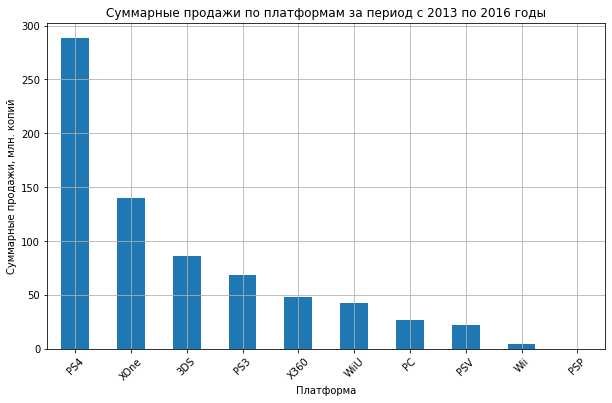

In [40]:
# Построение графика
plt.figure(figsize=(10, 6))
platform_sales_2014_2016_sorted.plot(kind='bar', grid=True)
plt.title('Суммарные продажи по платформам за период с 2013 по 2016 годы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.xticks(rotation=45)
plt.show()

По результатам расчета и построения графика мы видим, что самая популярная платформа в последние годы - PS4. Топ-5 платформ:
- PS4
- PS3
- XOne
- 3DS
- X360

Для наглядности построим график с общими продажами с 2013 года

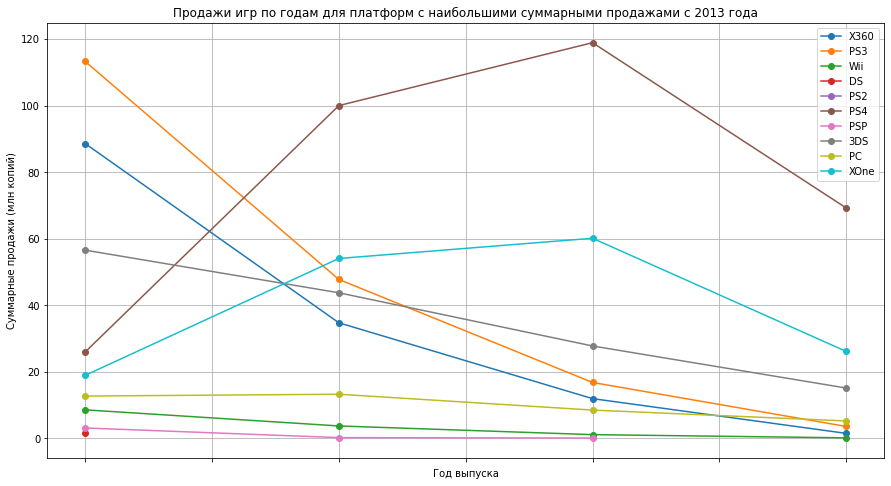

In [41]:
# Выберем платформы с наибольшими суммарными продажами с 2013 года
top_platforms_2014_2016 = games[games['year_of_release'] > 2013].groupby('platform')['total_sales'].sum().nlargest(15).index

# Отфильтруем данные только для выбранных платформ
top_platforms_2014_2016_data = games[games['platform'].isin(top_platforms_2014_2016)]

# Построим распределение по годам для каждой из выбранных платформ
plt.figure(figsize=(15, 8))
for platform in top_platforms:
    platform_sales = games[(games['platform'] == platform) & (games['year_of_release'] >= 2013)]
    platform_sales.groupby('year_of_release')['total_sales'].sum().plot(label=platform, marker='o', linestyle='-')
plt.title('Продажи игр по годам для платформ с наибольшими суммарными продажами с 2013 года')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

Учитывая, что данные за 2016-й год неполные, то следует выделить наиболее перспективные платформы:
- PS4
- XOne

Следующие платформы также стоит учитывать:
- PS3 (все еще много продаж по данным полного 2015-го года)
- X360 (все еще много продаж по данным полного 2015-го года)
- PC (количество продаж практически не падает)
- 3DS (количество продаж падает, но незначительно)

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит дополнить перечень перспективных платформ

        
даже  на падающих продажах можно заработать, когда объем составляет около 15-20 млн. копий, как например с 3DS
        
30-тилетняя история персональных компьютеров говорит, что игры для PC можно включить в рекомендацию
        


### Построение графика "ящик с усами" по глобальным продажам игр в разбивке по платформам. Описание результата

Статистика глобальных продаж по платформам в 2013-2016 году:
          count      mean       std   min     25%    50%     75%    max
platform                                                               
3DS       212.0  0.408868  1.188368  0.01  0.0300  0.090  0.2500  11.68
PC        151.0  0.179139  0.329359  0.01  0.0200  0.060  0.2000   3.05
PS3       219.0  0.311324  0.633059  0.01  0.0400  0.110  0.3250   5.27
PS4       376.0  0.766356  1.614969  0.01  0.0575  0.185  0.6900  14.63
PSP        13.0  0.027692  0.027735  0.01  0.0100  0.020  0.0200   0.09
PSV       295.0  0.075932  0.141591  0.01  0.0200  0.040  0.0900   1.96
Wii        11.0  0.460909  0.625451  0.01  0.0350  0.180  0.7550   2.01
WiiU       73.0  0.588767  1.161467  0.01  0.0500  0.190  0.5700   7.09
X360      111.0  0.434414  0.628967  0.01  0.0700  0.180  0.5050   4.28
XOne      228.0  0.615614  1.046513  0.01  0.0500  0.205  0.6325   7.39


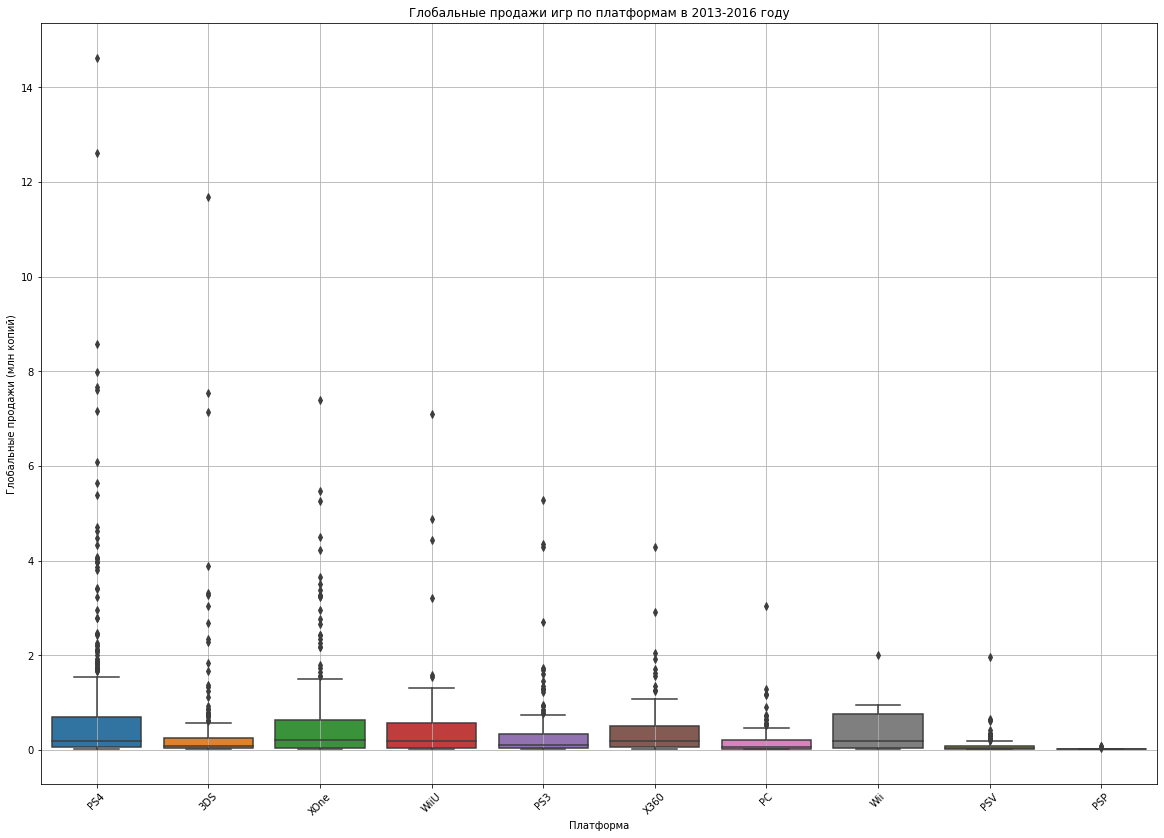

In [42]:
# Отфильтруем данные только за 2014-2016 год
games_2014_2016
# Построим "ящик с усами" для глобальных продаж по платформам
plt.figure(figsize=(20, 14))
sns.boxplot(data=games_2014_2016, x='platform', y='total_sales')
plt.title('Глобальные продажи игр по платформам в 2013-2016 году')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(True)

# Добавим описание статистики к графику
platform_sales_stats = games_2014_2016.groupby('platform')['total_sales'].describe()
print("Статистика глобальных продаж по платформам в 2013-2016 году:")
print(platform_sales_stats)

plt.show()


Мы построили графики и добавили описание методом describe(). Видим, что по графикам "ящик с усами" лидеры - X360, PS4, XOne, WiiU, Wii. Однако, следует учитывать жизненных цикл платформ, особенно теряющих популярность (прошлоее поколение: PS3, X360, Wii). По среднему значению из перспективных платформ впереди PS4, на данной платформе больше игр, с продажами за гранью "усов"

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? 

###### Рассмотрим самые перспективные платформы - PS4, XOne. Еще для наглядности добавим WiiU, 3DS

#### Изучение влияния отзывов для PS4

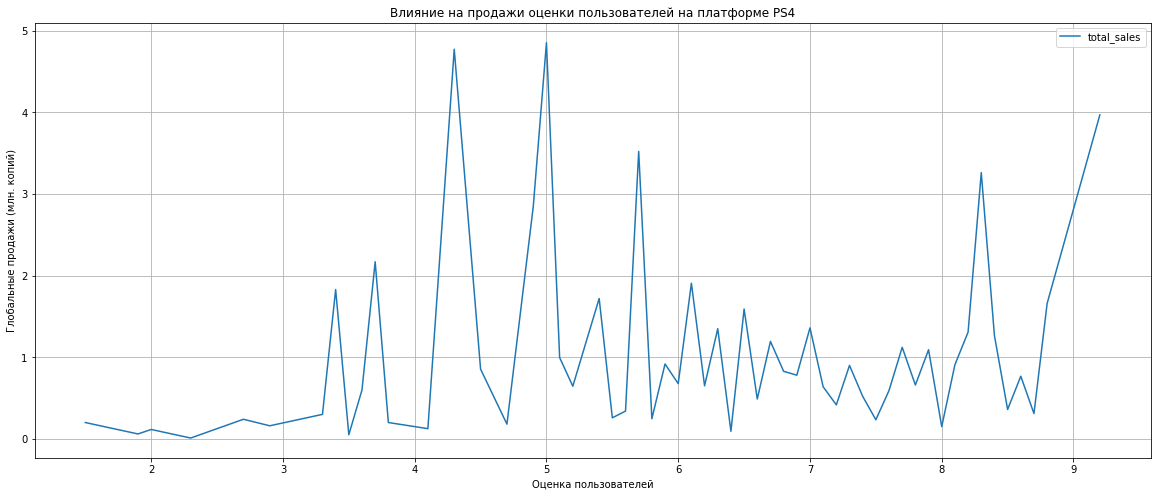

In [43]:
# Отфильтруем данные
ps4_data = games[games['platform'] == 'PS4'].dropna(subset=['critic_score', 'user_score'])

#построим график зависимости
(ps4_data.pivot_table(index='user_score', values='total_sales')
 .plot(grid=True, figsize=(20, 8))
)

plt.title('Влияние на продажи оценки пользователей на платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')
plt.show()

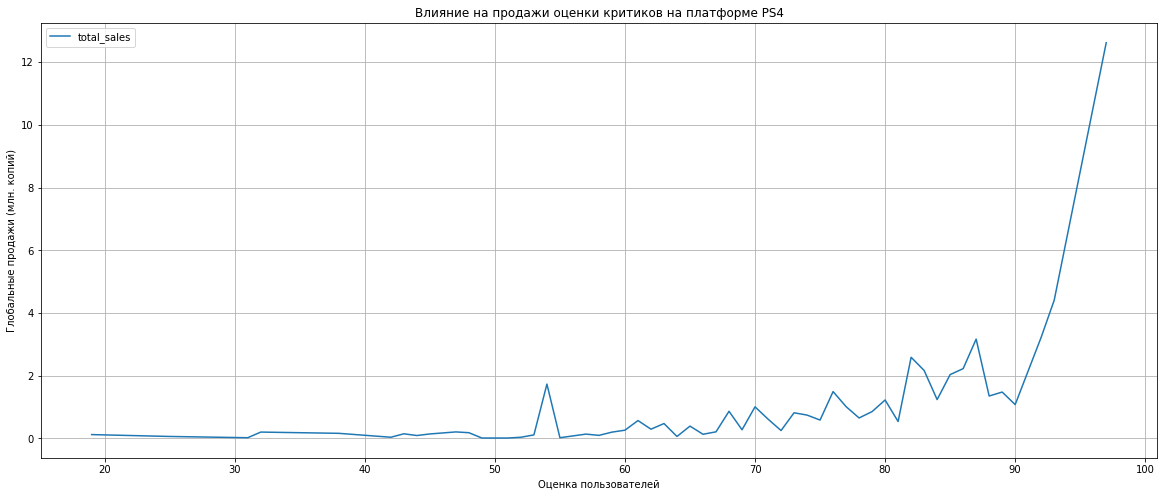

In [44]:
#построим график зависимости
(ps4_data.pivot_table(index='critic_score', values='total_sales')
 .plot(grid=True, figsize=(20, 8))
)

plt.title('Влияние на продажи оценки критиков на платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')
plt.show()

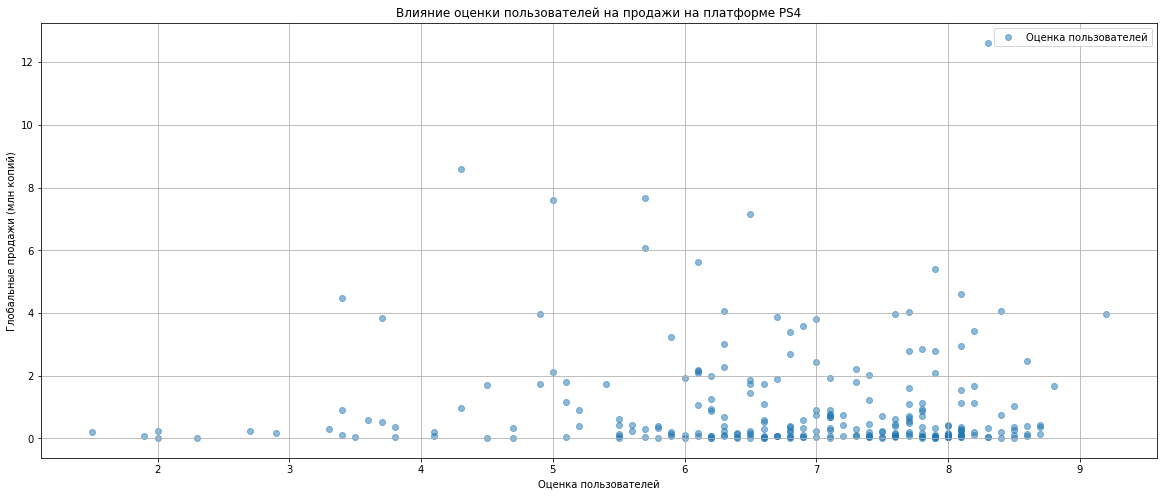

In [45]:
# Построим диаграмму рассеяния для отзывов критиков и пользователей и глобальных продаж
plt.figure(figsize=(20, 8))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], label='Оценка пользователей', alpha=0.5)
plt.title('Влияние оценки пользователей на продажи на платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

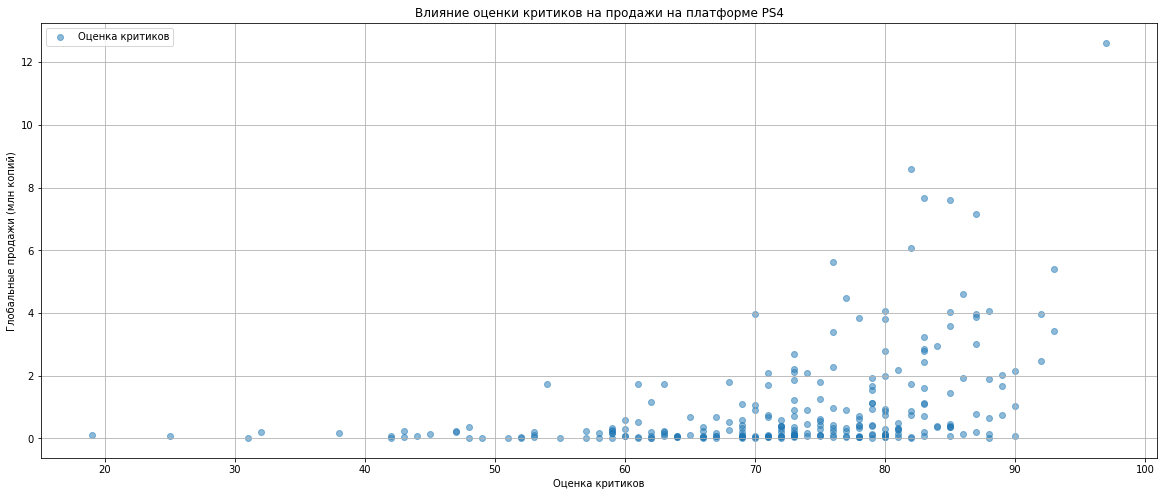

In [46]:
# Построим диаграмму рассеяния для отзывов критиков и пользователей и глобальных продаж
plt.figure(figsize=(20, 8))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], label='Оценка критиков', alpha=0.5)
plt.title('Влияние оценки критиков на продажи на платформе PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Вычислим корреляцию между оценками пользователей  и критиков и продажами
correlation_critic = ps4_data['critic_score'].corr(ps4_data['total_sales'])
correlation_user = ps4_data['user_score'].corr(ps4_data['total_sales'])

print("Корреляция между отзывами критиков и продажами на PS4:", correlation_critic)
print("Корреляция между отзывами пользователей и продажами на PS4:", correlation_user)

Корреляция между отзывами критиков и продажами на PS4: 0.40589480145836687
Корреляция между отзывами пользователей и продажами на PS4: -0.03362497596528878


По графикам видим:
- корреляция продаж с оценками пользователей отсутствует
- корреляция продаж с оценками критиков прослеживается после оценки 70

Видим подтверждение по результатам расчетов:
- корреляция продаж и оценок пользователей близка к нулю
- корреляция продаж и оценок критиков составила 40,6%, указывает на существенную, но не очень сильную связь между отзывами критиков и количеством продаж

#### Изучение влияния отзывов для XOne

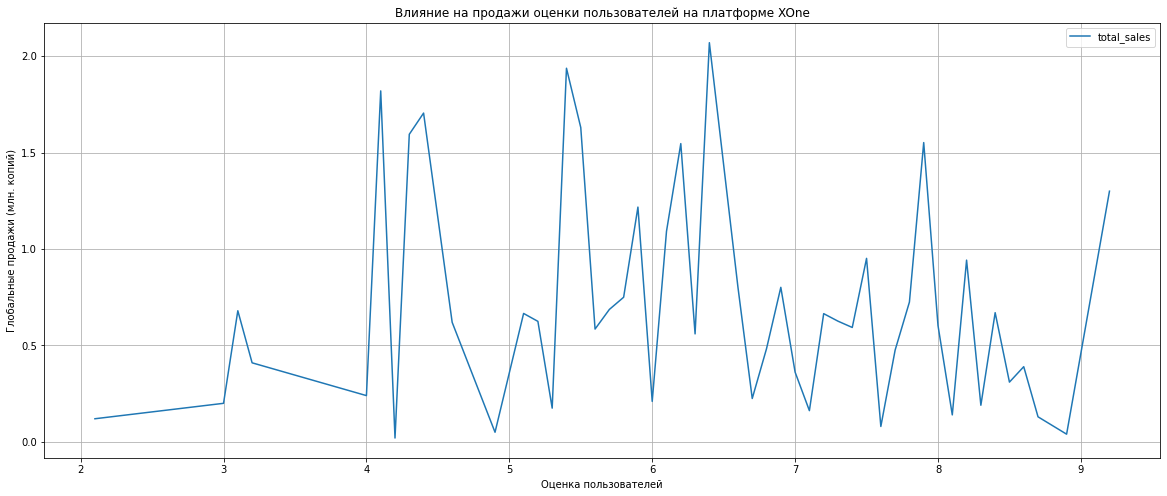

In [48]:
# Отфильтруем данные
xone_data = games[games['platform'] == 'XOne'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

#построим график зависимости
(xone_data.pivot_table(index='user_score', values='total_sales')
 .plot(grid=True, figsize=(20, 8))
)

plt.title('Влияние на продажи оценки пользователей на платформе XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')
plt.show()

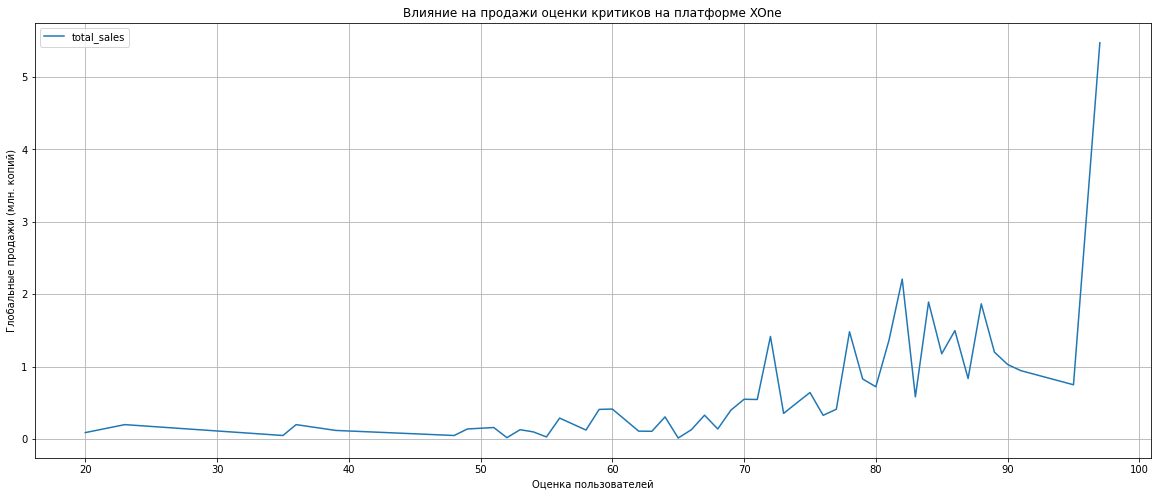

In [49]:
#построим график зависимости
(xone_data.pivot_table(index='critic_score', values='total_sales')
 .plot(grid=True, figsize=(20, 8))
)

plt.title('Влияние на продажи оценки критиков на платформе XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')
plt.show()

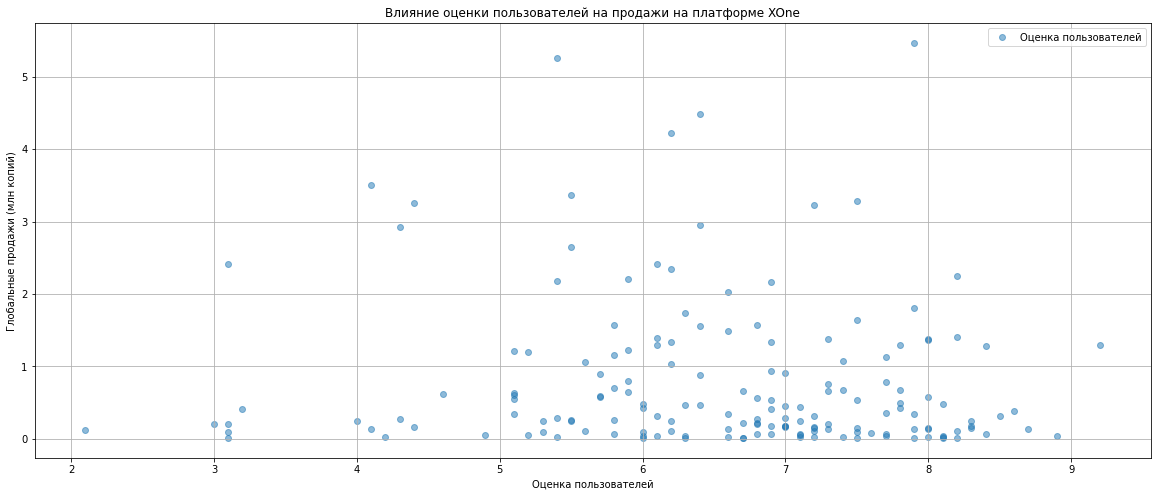

In [50]:
# Построим диаграмму рассеяния для отзывов критиков и пользователей и глобальных продаж
plt.figure(figsize=(20, 8))
plt.scatter(xone_data['user_score'], xone_data['total_sales'], label='Оценка пользователей', alpha=0.5)
plt.title('Влияние оценки пользователей на продажи на платформе XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

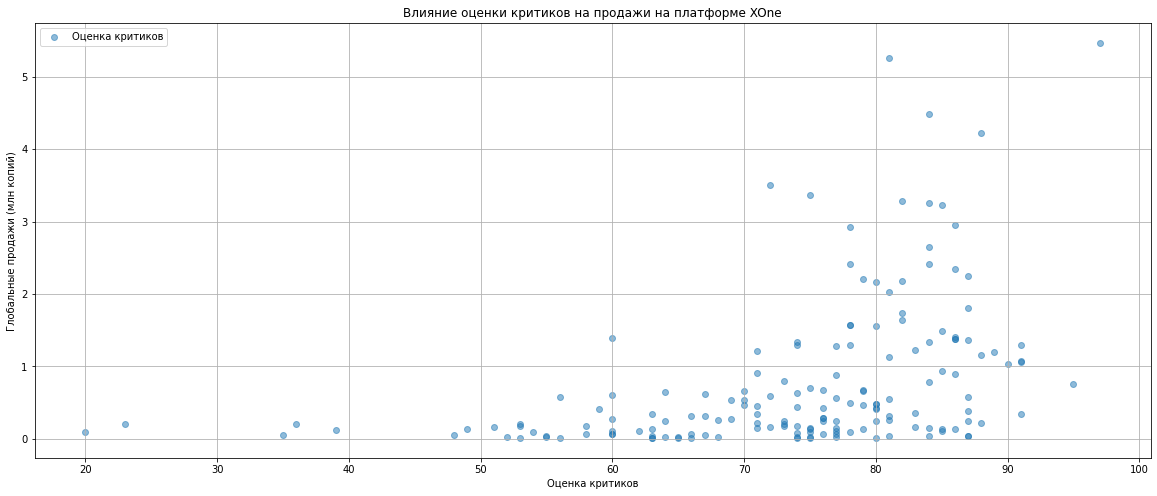

In [51]:
# Построим диаграмму рассеяния для отзывов критиков и пользователей и глобальных продаж
plt.figure(figsize=(20, 8))
plt.scatter(xone_data['critic_score'], xone_data['total_sales'], label='Оценка критиков', alpha=0.5)
plt.title('Влияние оценки критиков на продажи на платформе XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Вычислим корреляцию между оценками пользователей  и критиков и продажами
correlation_critic = xone_data['critic_score'].corr(xone_data['total_sales'])
correlation_user = xone_data['user_score'].corr(xone_data['total_sales'])

print("Корреляция между отзывами критиков и продажами на XOne:", correlation_critic)
print("Корреляция между отзывами пользователей и продажами на XOne:", correlation_user)

Корреляция между отзывами критиков и продажами на XOne: 0.41042203561296375
Корреляция между отзывами пользователей и продажами на XOne: -0.09400318326920852


По графикам видим:
- корреляция продаж с оценками пользователей отсутствует
- корреляция продаж с оценками критиков прослеживается после оценки 70

Видим подтверждение по результатам расчетов:
- корреляция продаж и оценок пользователей близка к нулю
- корреляция продаж и оценок критиков составила 41%, указывает на существенную, но не очень сильную связь между отзывами критиков и количеством продаж

Практически полнотью повторяет результаты для PS4

#### Изучение влияния отзывов для WiiU

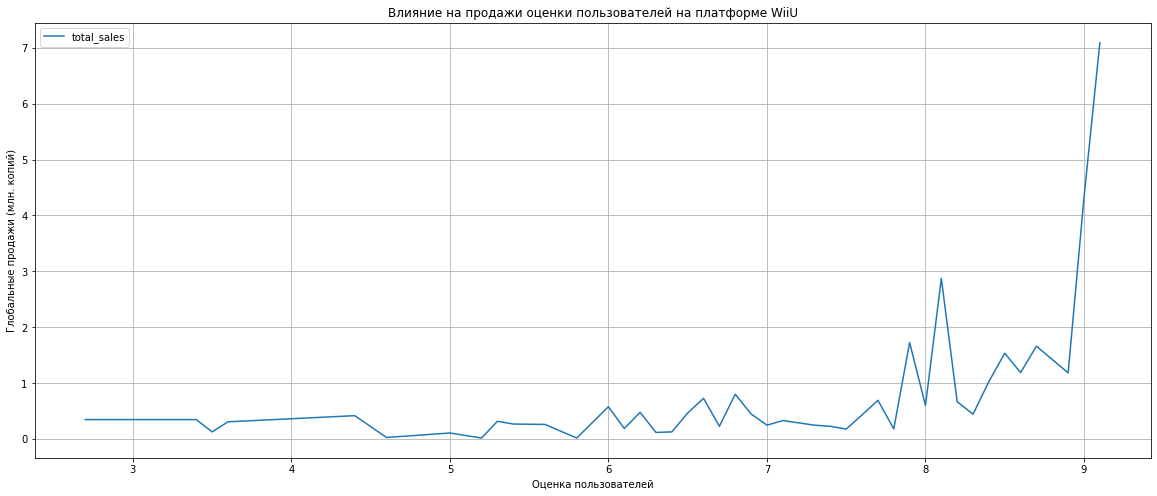

In [53]:
# Отфильтруем данные
wiiu_data = games[games['platform'] == 'WiiU'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

#построим график зависимости
(wiiu_data.pivot_table(index='user_score', values='total_sales')
 .plot(grid=True, figsize=(20, 8))
)

plt.title('Влияние на продажи оценки пользователей на платформе WiiU')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')
plt.show()

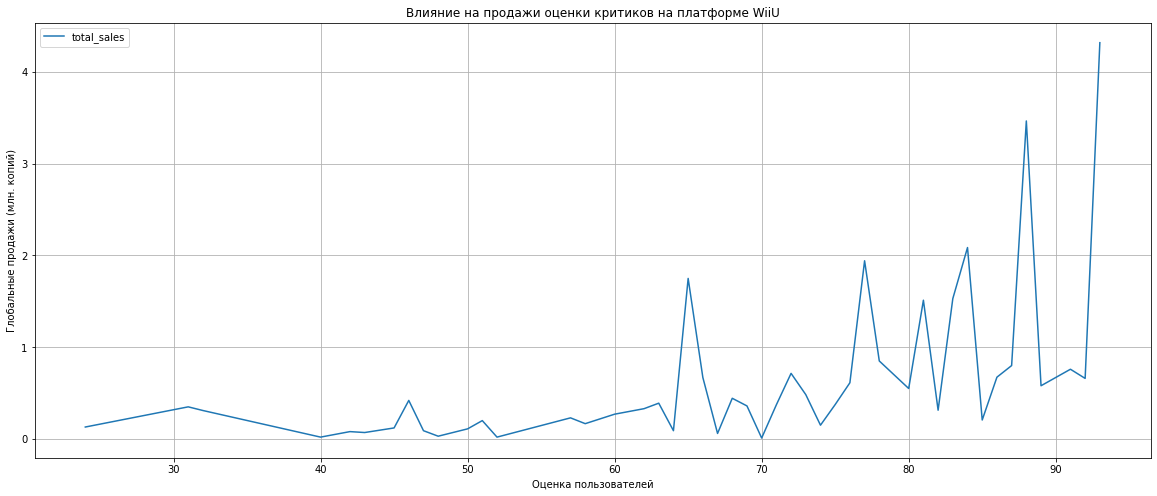

In [54]:
#построим график зависимости
(wiiu_data.pivot_table(index='critic_score', values='total_sales')
 .plot(grid=True, figsize=(20, 8))
)

plt.title('Влияние на продажи оценки критиков на платформе WiiU')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')
plt.show()

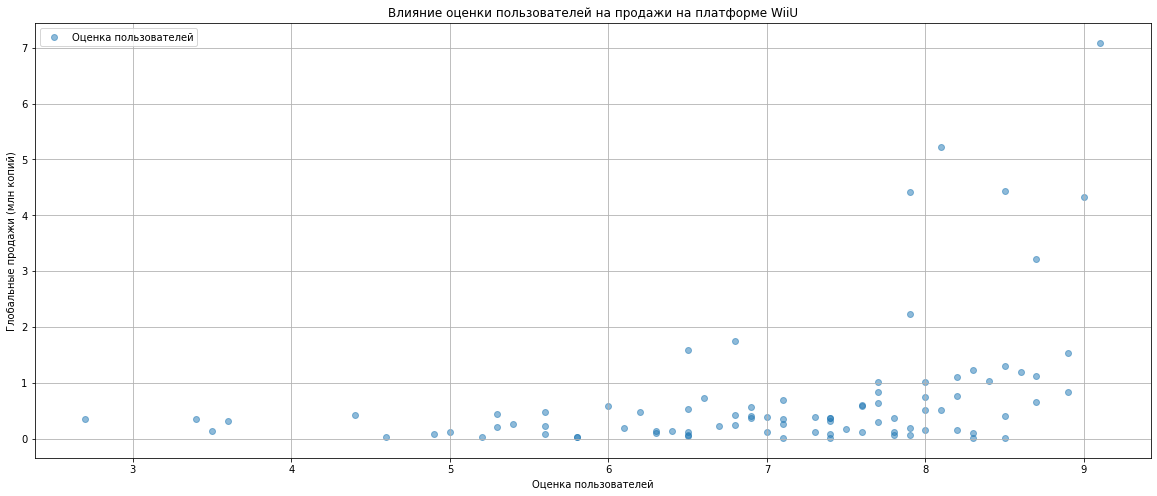

In [55]:
# Построим диаграмму рассеяния для отзывов критиков и пользователей и глобальных продаж
plt.figure(figsize=(20, 8))
plt.scatter(wiiu_data['user_score'], wiiu_data['total_sales'], label='Оценка пользователей', alpha=0.5)
plt.title('Влияние оценки пользователей на продажи на платформе WiiU')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

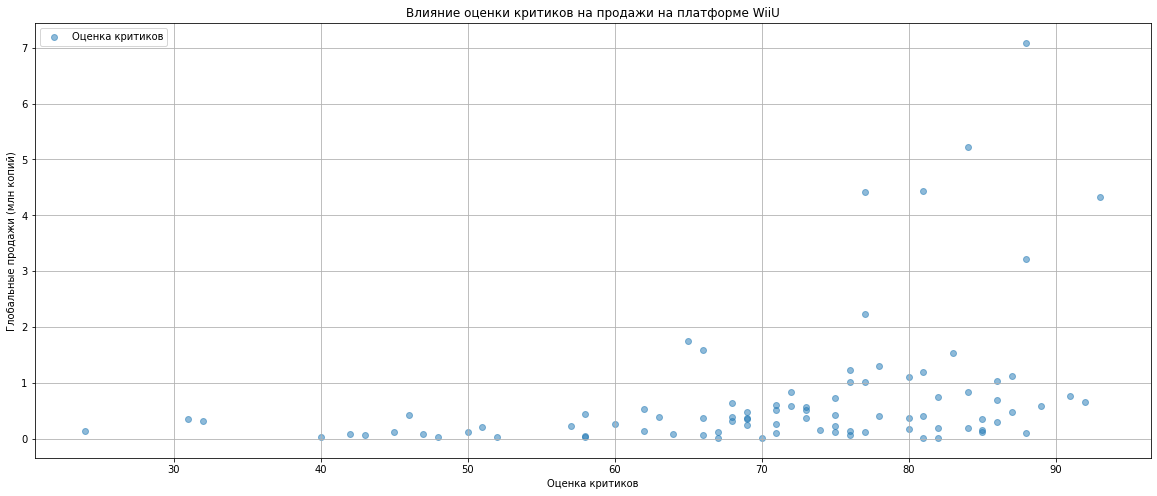

In [56]:
# Построим диаграмму рассеяния для отзывов критиков и пользователей и глобальных продаж
plt.figure(figsize=(20, 8))
plt.scatter(wiiu_data['critic_score'], wiiu_data['total_sales'], label='Оценка критиков', alpha=0.5)
plt.title('Влияние оценки критиков на продажи на платформе WiiU')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Вычислим корреляцию между оценками пользователей  и критиков и продажами
correlation_critic = wiiu_data['critic_score'].corr(wiiu_data['total_sales'])
correlation_user = wiiu_data['user_score'].corr(wiiu_data['total_sales'])

print("Корреляция между отзывами критиков и продажами на WiiU:", correlation_critic)
print("Корреляция между отзывами пользователей и продажами WiiU:", correlation_user)

Корреляция между отзывами критиков и продажами на WiiU: 0.350882422488643
Корреляция между отзывами пользователей и продажами WiiU: 0.3918479505297129


По графикам видим:
- невысокая корреляция продаж с оценками пользователей прослеживается после оценки 8
- корреляция продаж с оценками критиков прослеживается после оценки 70

Видим подтверждение по результатам расчетов:
- корреляция продаж и оценок пользователей составила 39,2%, указывает на существенную, но не очень сильную связь между отзывами пользователей и количеством продаж, значительно выше чем на XOne и PS4
- корреляция продаж и оценок критиков составила 35,1%, указывает на не очень сильную связь между отзывами критиков и количеством продаж

Корреляция с оценками пользователей сильно выше чем на предыдущих платформах. Корреляция с оценками критиков на том же уровне

#### Изучение влияния отзывов для 3DS

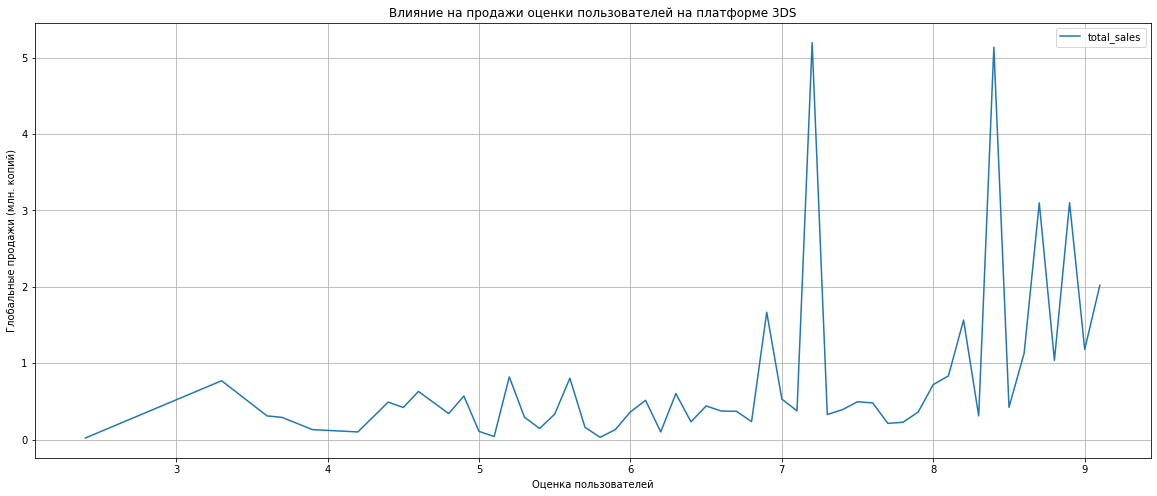

In [58]:
# Отфильтруем данные
three_ds_data = games[games['platform'] == '3DS'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

#построим график зависимости
(three_ds_data.pivot_table(index='user_score', values='total_sales')
 .plot(grid=True, figsize=(20, 8))
)

plt.title('Влияние на продажи оценки пользователей на платформе 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')
plt.show()

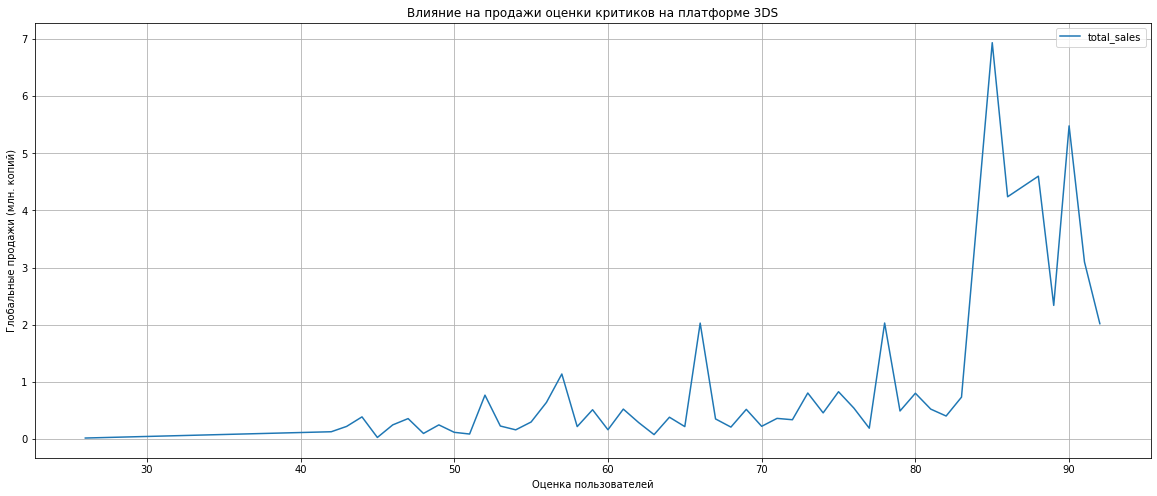

In [59]:
#построим график зависимости
(three_ds_data.pivot_table(index='critic_score', values='total_sales')
 .plot(grid=True, figsize=(20, 8))
)

plt.title('Влияние на продажи оценки критиков на платформе 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн. копий)')
plt.show()

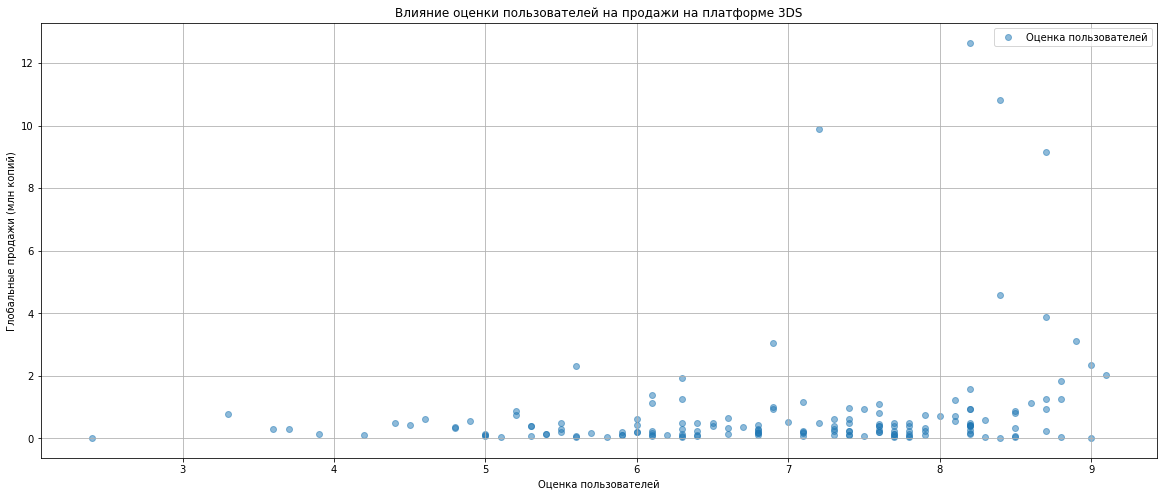

In [60]:
# Построим диаграмму рассеяния для отзывов критиков и пользователей и глобальных продаж
plt.figure(figsize=(20, 8))
plt.scatter(three_ds_data['user_score'], three_ds_data['total_sales'], label='Оценка пользователей', alpha=0.5)
plt.title('Влияние оценки пользователей на продажи на платформе 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

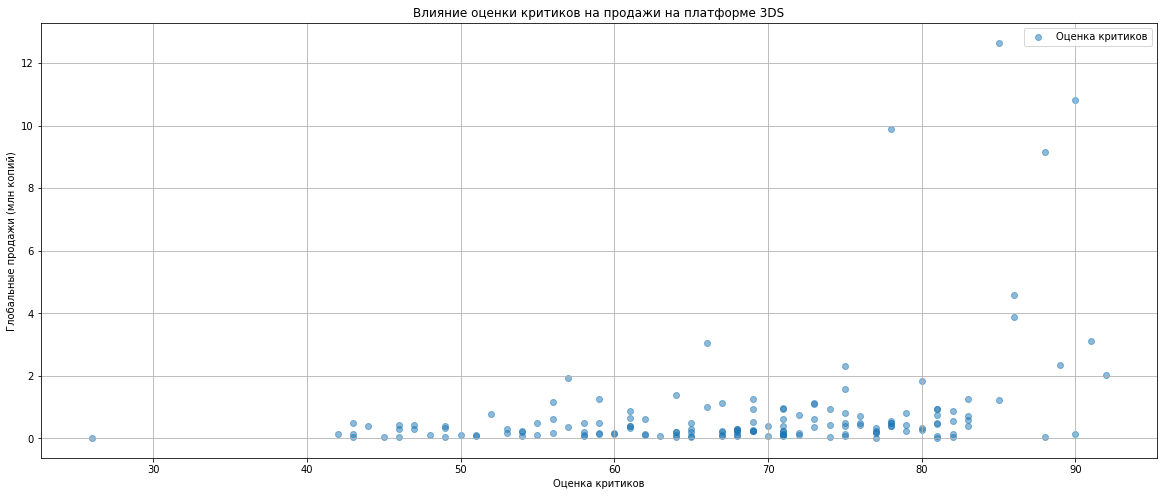

In [61]:
# Построим диаграмму рассеяния для отзывов критиков и пользователей и глобальных продаж
plt.figure(figsize=(20, 8))
plt.scatter(three_ds_data['critic_score'], three_ds_data['total_sales'], label='Оценка критиков', alpha=0.5)
plt.title('Влияние оценки критиков на продажи на платформе 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Вычислим корреляцию между оценками пользователей  и критиков и продажами
correlation_critic = three_ds_data['critic_score'].corr(three_ds_data['total_sales'])
correlation_user = three_ds_data['user_score'].corr(three_ds_data['total_sales'])

print("Корреляция между отзывами критиков и продажами на 3DS:", correlation_critic)
print("Корреляция между отзывами пользователей и продажами 3DS:", correlation_user)

Корреляция между отзывами критиков и продажами на 3DS: 0.3398243344453552
Корреляция между отзывами пользователей и продажами 3DS: 0.2334027438079285


По графикам видим:
- небольшая корреляция продаж с оценками пользователей прослеживается после оценки 8
- небольшая корреляция продаж с оценками критиков прослеживается после оценки 70

Видим подтверждение по результатам расчетов:
- корреляция продаж и оценок пользователей составила 23,3%, указывает слабую связь между отзывами пользователей и количеством продаж, хоти и выше чем на XOne и PS4
- корреляция продаж и оценок критиков составила 34,0%, на не очень сильную связь между отзывами критиков и количеством продаж

Корреляция немного схожа с корреляцией для платформы WiiU

В целом оценки критиков и пользователей не являются единственными характеристиками, влияющими на показатели объема продаж

### Оценка общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

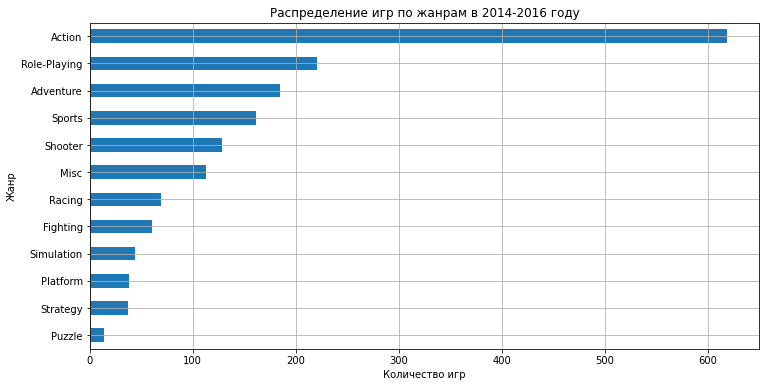

In [63]:
# Подсчитываем количество игр в каждом жанре
genre_counts = games_2014_2016['genre'].value_counts()

# Сортируем значения по убыванию
genre_counts_sorted = genre_counts.sort_values(ascending=True)

# Строим гистограмму
plt.figure(figsize=(12, 6))
genre_counts_sorted.plot(kind='barh', grid=True)
plt.title('Распределение игр по жанрам в 2014-2016 году')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.show()

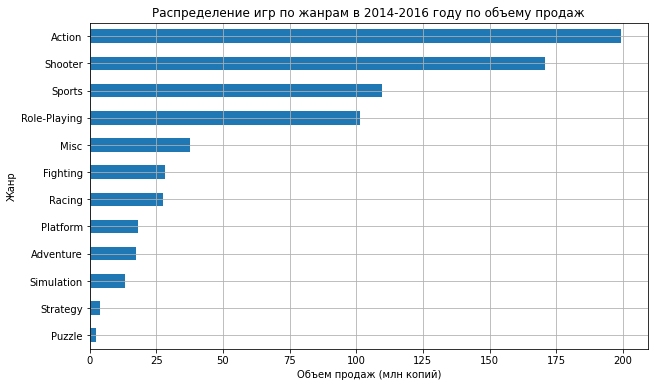

In [64]:
# Группируем данные по жанру и суммируем продажи
genre_sales = games_2014_2016.groupby('genre')['total_sales'].sum()

# Сортируем значения по убыванию
genre_sales_sorted = genre_sales.sort_values(ascending=True)

# Строим гистограмму
plt.figure(figsize=(10, 6))
genre_sales_sorted.plot(kind='barh', grid=True)
plt.title('Распределение игр по жанрам в 2014-2016 году по объему продаж')
plt.xlabel('Объем продаж (млн копий)')
plt.ylabel('Жанр')
plt.show()


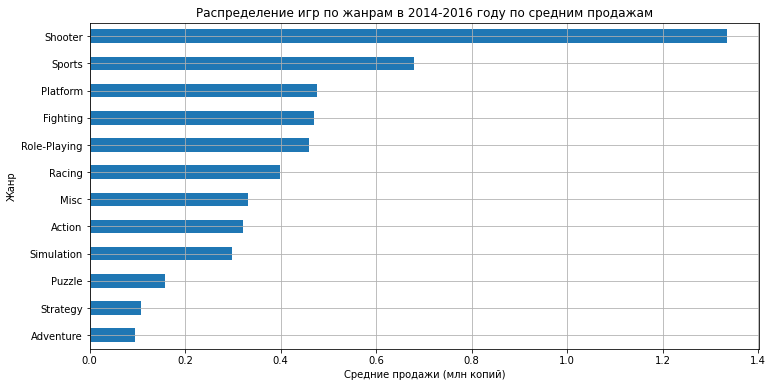

In [65]:
# Группируем данные по жанру и вычисляем средние продажи
genre_mean_sales = games_2014_2016.groupby('genre')['total_sales'].mean()

# Сортируем значения по убыванию
genre_mean_sales_sorted = genre_mean_sales.sort_values(ascending=True)

# Строим гистограмму
plt.figure(figsize=(12, 6))
genre_mean_sales_sorted.plot(kind='barh', grid=True)
plt.title('Распределение игр по жанрам в 2014-2016 году по средним продажам')
plt.xlabel('Средние продажи (млн копий)')
plt.ylabel('Жанр')
plt.show()


Построим диаграмму размаха, сравним медианные продажи в каждом жанре с выбросами и без

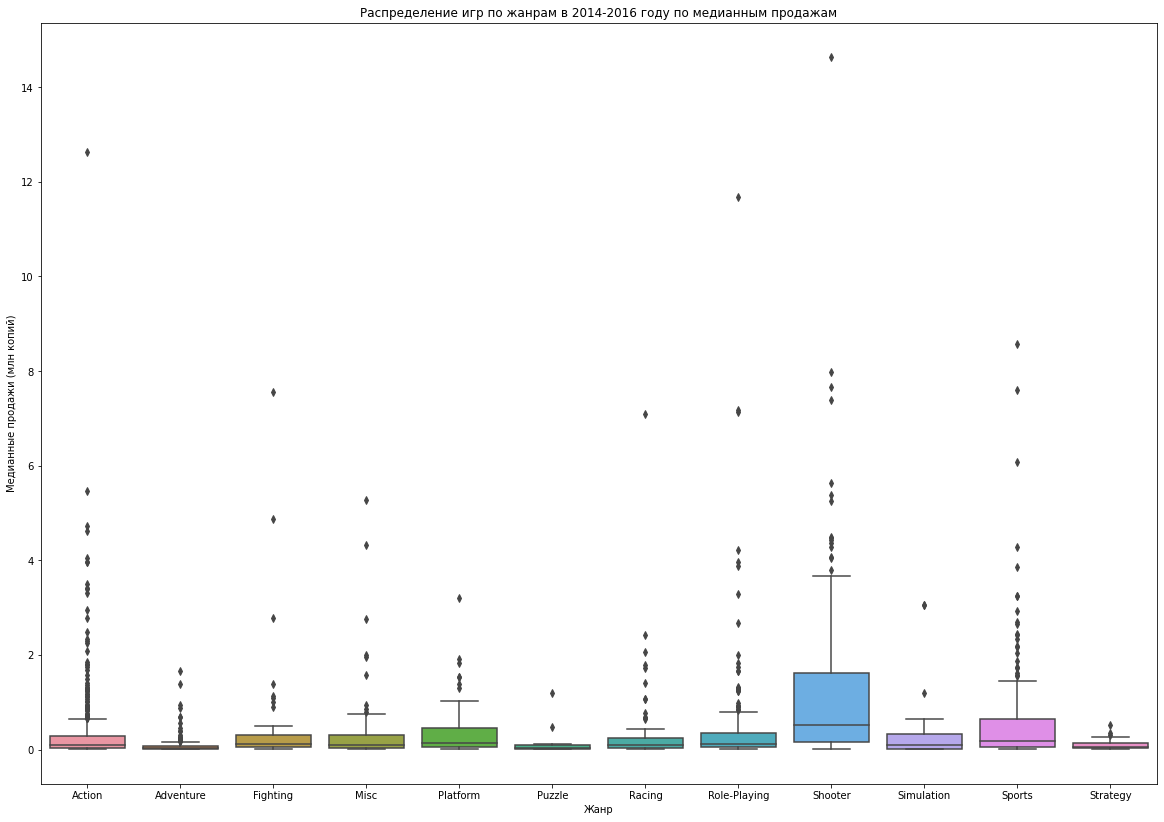

In [66]:
# Группируем данные по жанру и вычисляем медианные продажи
genre_median_sales = games_2014_2016.groupby('genre')['total_sales'].median()

# Строим вертикальную диаграмму размаха
plt.figure(figsize=(20, 14))
sns.boxplot(y='total_sales', x='genre', data=games_2014_2016, order=genre_median_sales.index)
plt.title('Распределение игр по жанрам в 2014-2016 году по медианным продажам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи (млн копий)')
plt.show()

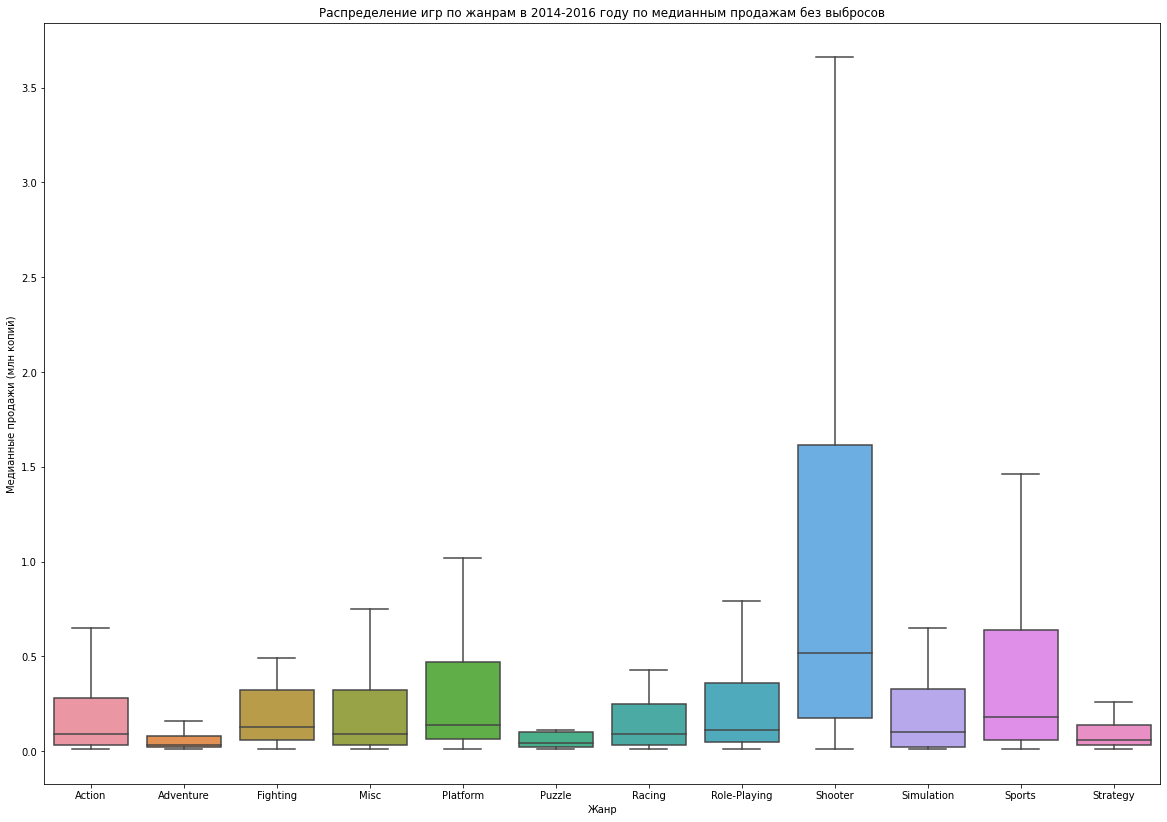

In [67]:
# Группируем данные по жанру и вычисляем медианные продажи
genre_median_sales = games_2014_2016.groupby('genre')['total_sales'].median()

# Строим вертикальную диаграмму размаха без выбросов
plt.figure(figsize=(20, 14))
sns.boxplot(y='total_sales', x='genre', data=games_2014_2016, order=genre_median_sales.index, showfliers=False)
plt.title('Распределение игр по жанрам в 2014-2016 году по медианным продажам без выбросов')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи (млн копий)')
plt.show()

Еще для наглядности применим метод describe()

In [68]:
games_2014_2016.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


Видим, что по медианным и средним показателям жанр Shooter лидер с запасом

###### Вывод
Мы построили графики для того, чтобы посмотреть распределение количества игр по жанрам, распределение игр по общему объему продаж, распределение среднего числа продаж.

Больше всего игр в следующих жанрах (топ-3):
- Action (лидер с запасом)
- Role-Playing
- Adventure

Выявлены следующие прибыльные жанры по среднему числу объема продаж (топ-3):
- Shooter (лидер с запасом)
- Sports
- Platform

По медианным показателям продаж с большим запасом лидирует жанр Shooter.

Три худших жанра по среднему числу продаж:
- Adventure
- Strategy
- Puzzle

### Вывод по шагу 3

Мы провели исследовательский анализ данных. Можно сделать следующие выводы:
- популярность большинства платформ упала
- самые "живые" платформы - PS4, XOne, WiiU, 3DS
- самые перспективные платформы - PS4, XOne
- платформы, которые теряют популярность из-за выпуска нового поколения - PS3, X360, Wii
- медианный срок жизни платформы - 6 лет
- средний срок жизни платформы - 7.6 лет
- срок жизни самых популярных платформ часто превышает 10 лет
- актуальный период - 2014-2016 гг.
- медианные показатели общего объема продаж для игр на новых платформ PS4, XOne, WiiU примерно одинаковы
- средний покатель объема продаж для игр по платформам выше всего на платформе PS4
- корреляция между оценками критиков и общим числом продаж игры колеблется примерно от 35% до 40%, имеется существенная, но не очень сильная связь; отчетливо видна связь для игр с оценкой критиков выше 80
- корреляция между оенками пользователей и общим числом продаж игры отсутствует на платформах PS4 и XOne, имеется небольшая связь на платформах 3DS и  WiiU (от 20% до 40%)
- в целом оценки критиков и пользователей не являются единственными характеристиками, влияющими на показатели объема продаж
- прослеживается предпочтение покупателей по жанрам: Shooter, Sports, Platform (топ-3 по среднему показателю общего числа проданный копий)
- продажи игр жанра Shooter лидируют с большим запасом по медианным значениям
- худшие жанры по среднему числу продаж: Adventure, Strategy, Puzzle

## Шаг 4. Составление портрета пользователя каждого региона


### Определение для каждого региона (NA, EU, JP) самых популярных платформ (топ-5), описание различий в долях продаж

###### Без привязки к региону

Для начала посчитаем общий объем продаж без привязки к регионам и построим диаграмму. Платформы за пределами топ-5 включим в категорию "Другие", а затем построим круговую диаграмму

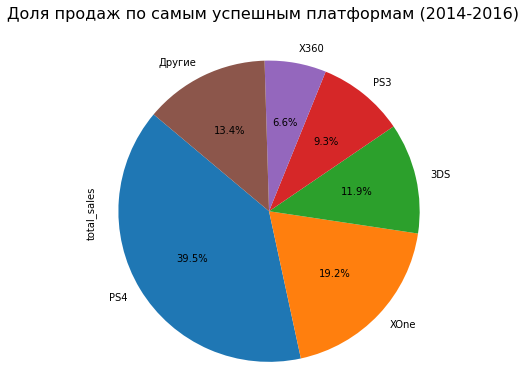

In [69]:
#подсчет продаж
top_platforms = games_2014_2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выделяем топ-5 платформ
top_platforms_filtered = top_platforms.nlargest(5)

# Выделяем платформы за пределами топ-5
other_platforms = top_platforms.nsmallest(len(top_platforms) - 5)

# Суммируем продажи за пределами топ-5 платформ и добавляем в группу "Другие"
other_sales = other_platforms.sum()
top_platforms_filtered['Другие'] = other_sales

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))
top_platforms_filtered.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Добавляем заголовок
plt.suptitle('Доля продаж по самым успешным платформам (2014-2016)', fontsize=16)

# Отображаем диаграмму
plt.axis('equal')
plt.show()

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />Круговая диаграмма малоинформативна для кол-ва категорий более 5-ти, невозможно за 5 сек. сравнить и решить какой вид заведения является отстающим, а самое главное определить — насколько сильно отстает PC от PSV, или наоборот
        
Стоит оставить ТОП-5 плюс категорию «Другие»        

Видим, что во всем мире топ-5 - это:
- PS4 - 39.5%
- XOne - 19.2%
- 3DS - 11.9%
- PS3 - 9.3%
- X360 - 6.6%

###### Сравнение по регионам

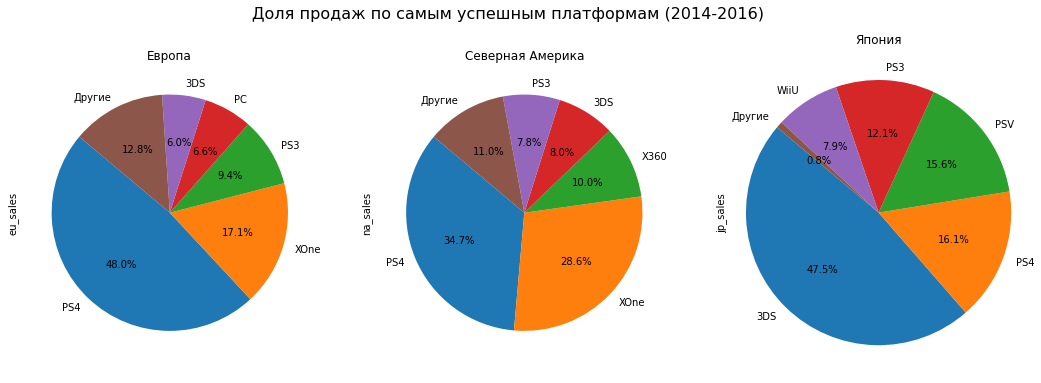

In [70]:
#подсчет продаж по регионам
top_platforms_eu = games_2014_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
top_platforms_jp = games_2014_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
top_platforms_na = games_2014_2016.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

# Выделяем топ-5 платформ
top_platforms_filtered_eu = top_platforms_eu.nlargest(5)

# Выделяем платформы за пределами топ-5
other_platforms_eu = top_platforms_eu.nsmallest(len(top_platforms) - 5)

# Суммируем продажи за пределами топ-5 платформ и добавляем в группу "Другие"
other_sales_eu = other_platforms_eu.sum()
top_platforms_filtered_eu['Другие'] = other_sales_eu

# Выделяем топ-5 платформ
top_platforms_filtered_na = top_platforms_na.nlargest(5)

# Выделяем платформы за пределами топ-5
other_platforms_na = top_platforms_na.nsmallest(len(top_platforms) - 5)

# Суммируем продажи за пределами топ-5 платформ и добавляем в группу "Другие"
other_sales_na = other_platforms_na.sum()
top_platforms_filtered_na['Другие'] = other_sales_na

# Выделяем топ-5 платформ
top_platforms_filtered_jp = top_platforms_jp.nlargest(5)

# Выделяем платформы за пределами топ-5
other_platforms_jp = top_platforms_jp.nsmallest(len(top_platforms) - 5)

# Суммируем продажи за пределами топ-5 платформ и добавляем в группу "Другие"
other_sales_jp = other_platforms_jp.sum()
top_platforms_filtered_jp['Другие'] = other_sales_jp

# Создаем фигуру и оси
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Построение круговых диаграмм для Европы, Северной Америки и Японии
top_platforms_filtered_eu.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[0])
axes[0].set_title('Европа')

top_platforms_filtered_na.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[1])
axes[1].set_title('Северная Америка')

top_platforms_filtered_jp.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[2])
axes[2].set_title('Япония')

# Добавляем общий заголовок
fig.suptitle('Доля продаж по самым успешным платформам (2014-2016)', fontsize=16)

# Отображаем диаграммы
plt.axis('equal')
plt.show()

Видим, что в Европе топ-5 - это:
- PS4 - 48.0%
- XOne - 17.1%
- PS3 - 9.4%
- PC - 6.6%
- 3DS - 6.0%

В Северной Америке:
- PS4 - 34.7%
- XOne - 28.6%
- X360 - 10.0%
- 3DS - 8.0%
- PS3 - 7.8%

В Японии сильно отличается картина. Лидеры:
- 3DS - 47.5%
- PS4 - 16.1%
- PSV - 15.6%
- PS3 - 12.1%
- WiiU - 7.9%

### Определение для каждого региона (NA, EU, JP) самых популярных жанров (топ-5)

###### Без привязки к региону

Для начала посчитаем общий объем продаж без привязки к регионам и потроим диаграмму. Платформы с небольшой долей (менее 3%) на диаграмме объединим в группу "Другие"

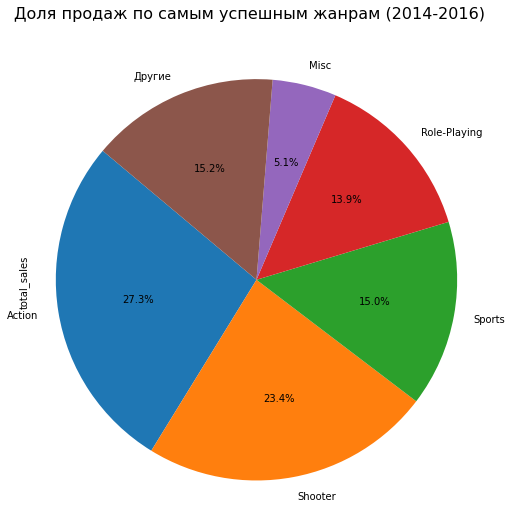

In [71]:
#подсчет продаж
top_genres = games_2014_2016.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Выделяем топ-5 жанров
top_genres_filtered = top_genres.nlargest(5)

# Выделяем жанры за пределами топ-5
other_genres = top_genres.nsmallest(len(top_genres) - 5)

# Суммируем продажи за пределами топ-5 жанров и добавляем в группу "Другие"
other_sales = other_genres.sum()
top_genres_filtered['Другие'] = other_sales

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
top_genres_filtered.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Добавляем заголовок
plt.suptitle('Доля продаж по самым успешным жанрам (2014-2016)', fontsize=16)

# Отображаем диаграмму
plt.axis('equal')
plt.show()

Видим, что во всем мире лидеры по жанрам - это:
- Action - 27.3%
- Shooter - 23.4%
- Sports - 15.0%
- Role-Playing - 13.9%
- Misc - 5.1%

###### Сравнение по регионам

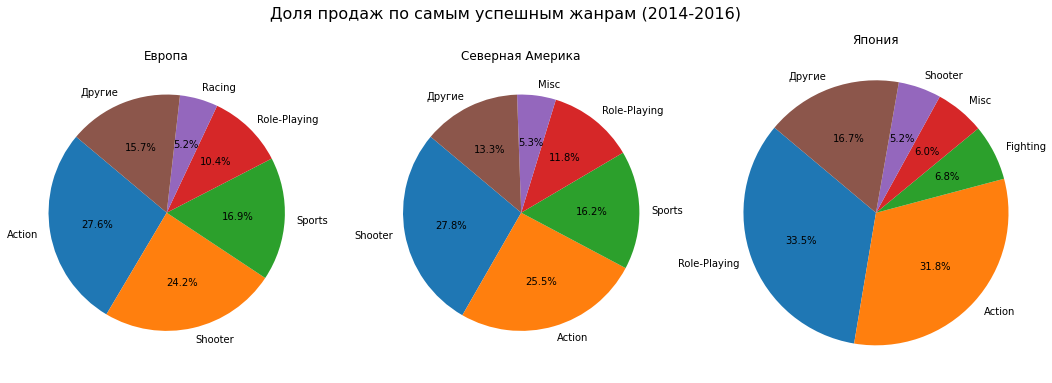

In [72]:
#подсчет продаж по регионам
top_genres_eu = games_2014_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_genres_jp = games_2014_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top_genres_na = games_2014_2016.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

# Выделяем топ-5 жанров
top_genres_filtered_eu = top_genres_eu.nlargest(5)

# Выделяем жанры за пределами топ-5
other_genres_eu = top_genres_eu.nsmallest(len(top_genres) - 5)

# Суммируем продажи за пределами топ-5 жанров и добавляем в группу "Другие"
other_sales_eu = other_genres_eu.sum()
top_genres_filtered_eu['Другие'] = other_sales_eu

# Выделяем топ-5 жанров
top_genres_filtered_na = top_genres_na.nlargest(5)

# Выделяем жанры за пределами топ-5
other_genres_na = top_genres_na.nsmallest(len(top_genres) - 5)

# Суммируем продажи за пределами топ-5 жанров и добавляем в группу "Другие"
other_sales_na = other_genres_na.sum()
top_genres_filtered_na['Другие'] = other_sales_na

# Выделяем топ-5 жанров
top_genres_filtered_jp = top_genres_jp.nlargest(5)

# Выделяем жанры за пределами топ-5
other_genres_jp = top_genres_jp.nsmallest(len(top_genres) - 5)

# Суммируем продажи за пределами топ-5 жанров и добавляем в группу "Другие"
other_sales_jp = other_genres_jp.sum()
top_genres_filtered_jp['Другие'] = other_sales_jp

# Создаем фигуру и оси
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Построение круговых диаграмм для Европы, Северной Америки и Японии
top_genres_filtered_eu.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[0])
axes[0].set_title('Европа')
axes[0].set_ylabel('')

top_genres_filtered_na.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[1])
axes[1].set_title('Северная Америка')
axes[1].set_ylabel('')

top_genres_filtered_jp.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[2])
axes[2].set_title('Япония')
axes[2].set_ylabel('')

# Добавляем общий заголовок
fig.suptitle('Доля продаж по самым успешным жанрам (2014-2016)', fontsize=16)

# Отображаем диаграммы
plt.axis('equal')
plt.show()

Видим, что в Европе топ-5 жанров - это:
- Action - 27.6%
- Shooter - 24.2%
- Sports - 16.9%
- Role-Playing - 10.4%
- Racing - 15.7%

В Северной Америке:
- Shooter - 27.8%
- Action - 25.5%
- Sports - 16.2%
- Role-Playing - 11.8%
- Misc - 5.3%

В Японии сильно отличается картина. Лидеры:
- Role-Playing - 33.5%
- Action - 31.8%
- Fighting - 6.8%
- Misc - 6.0%
- Shooter - 5.2%

### Влияние рейтинга ESRB на продажи в отдельных регионах

Построим для каждого региона барплот с рейтингом ESRB

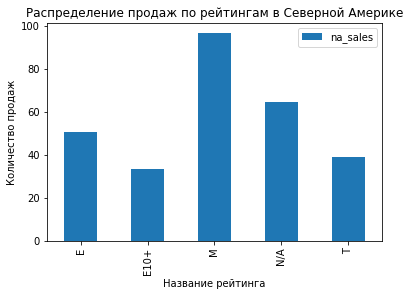

In [73]:
na_esrb = games_2014_2016.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot.bar()
plt.title("Распределение продаж по рейтингам в Северной Америке")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")
plt.show()

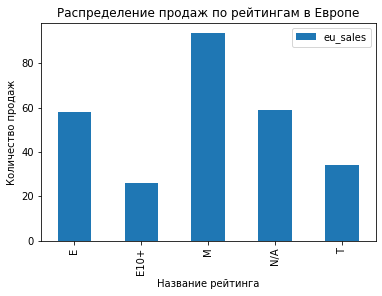

In [74]:
eu_esrb = games_2014_2016.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot.bar()
plt.title("Распределение продаж по рейтингам в Европе")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")
plt.show()

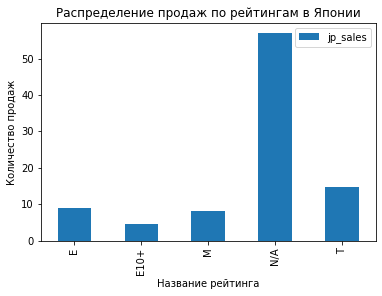

In [75]:
jp_esrb = games_2014_2016.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot.bar()
plt.title("Распределение продаж по рейтингам в Японии")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")
plt.show()

Можно сделать следующий вывод:
- в регионах различное распределение продаж в зависимости от рейтинга ESRB
- в Европе и Северной Америке распределение идентичное: сильно выше продажи игр с рейтингом "M" (для лиц старше 17 лет), хорошие продажи так же имеют игры без указания рейтинга 
- в Японии распределение сильно отличается от Европы и Северной Америки: успешнее всего продаются игры без ESRB-рейтинга
- рейтинг ESRB слабо влияет на продажи в Японии

Возможно игры, ориентированные в основном на японских рынок не проходят оценку с присвоением ESRB-рейтинга

### Вывод по шагу 4

Мы составили портрет пользователя каждого региона. Можно сделать следующие выводы:
- в Европе и Северной Америке популярнее всего платформа PS4
- в Японии очень популярна 3DS, почти 50% проданных игр
- самые популярные жанры в Европе и Америке: Action и Shooter
- самые популярные жанры в Японии: Role-Playing и Action 
- в регионах различное распределение продаж в зависимости от рейтинга ESRB
- в Европе и Северной Америке распределение идентичное: сильно выше продажи игр с рейтингом "M" (для лиц старше 17 лет), хорошие продажи так же имеют игры без указания рейтинга 
- в Японии распределение сильно отличается от Европы и Северной Америки: успешнее всего продаются игры без ESRB-рейтинга
- рейтинг ESRB слабо влияет на продажи в Японии

## Шаг 5. Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Проведем проверку двусторонним T-тестом для двух независимых выборок

Нулевая гипотеза: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC

Альтернативная гипотеза: средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC

Уровень статистической значимости зададим 0.05

In [76]:
# Отфильтруем данные
xbox_one_user_scores = games_2014_2016.query("platform == 'XOne'")['user_score'].dropna()
pc_user_scores = games_2014_2016.query("platform == 'PC'")['user_score'].dropna()

# Уровень значимости
alpha = 0.05

# Выполним t-тест для двухвыборочных независимых данных
results = st.ttest_ind(
    xbox_one_user_scores, 
    pc_user_scores,
    alternative='two-sided',
    equal_var=False)

print("p-значение:", results.pvalue)

# Сравнение p-значения с уровнем значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различаются")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

p-значение: 0.11601398086668832
Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


In [77]:
#Проверка
print("Средний пользовательский рейтинг платформы Xbox One составляет", xbox_one_user_scores.mean())
print("Средний пользовательский рейтинг платформы PC составляет", pc_user_scores.mean())

Средний пользовательский рейтинг платформы Xbox One составляет 6.594545454545456
Средний пользовательский рейтинг платформы PC составляет 6.298360655737705


P-значение - это вероятность получить наблюдаемый результат (или еще более экстремальный), если нулевая гипотеза верна. В данном случае, p-значение 0.116 означает, что при условии, что нулевая гипотеза верна, есть 11.6% вероятность получить такие или более выраженные различия между группами случайно.
Можно сделать вывод, что нулевая гипотеза не отвергется, нет достаточно убедительных данных, чтобы говорить, что средние пользовательские рейтинги платформ Xbox One и PC различаются

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
👍

### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Вновь проведем проверку двусторонним T-тестом для двух независимых выборок

Нулевая гипотеза: cредний пользовательский рейтинг жанра Action (англ. «действие», экшен-игры) равен среднему пользовательскому рейтингу жанра Sports (англ. «спортивные соревнования»)

Альтернативная гипотеза: cредний пользовательский рейтинг жанра Action (англ. «действие», экшен-игры) не равен среднему пользовательскому рейтингу жанра Sports (англ. «спортивные соревнования»)

Уровень статистической значимости оставим 0.05

In [78]:
# Отфильтруем данные по жанрам и удалим пропуски
action_user_scores = games_2014_2016.query("genre == 'Action'")['user_score'].dropna()
sports_user_scores = games_2014_2016.query("genre == 'Sports'")['user_score'].dropna()

# Уровень значимости
alpha = 0.05

# Выполним t-тест для двухвыборочных независимых данных
results = st.ttest_ind(
    action_user_scores, 
    sports_user_scores,
    alternative='two-sided',
    equal_var=False)

print("p-значение:", results.pvalue)

# Сравнение p-значения с уровнем значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports отличаются")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые.")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports отличаются


In [79]:
#Проверка
print("Средний пользовательский рейтинг жанра Action составляет", action_user_scores.mean())
print("Средний пользовательский рейтинг жанра Sports составляет", sports_user_scores.mean())

Средний пользовательский рейтинг жанра Action составляет 6.760606060606061
Средний пользовательский рейтинг жанра Sports составляет 5.2251968503937


В данном случае, p-значение очень близко к нулю. Если p-значение меньше статистической значимости, как в нашем случае, то мы отклоняем нулевую гипотезу в пользу альтернативной. Это означает, что есть статистически значимые различия между средними пользовательскими рейтингами жанров Action и Sports

### Вывод по шагу 5
Мы провели проверку двух гипотез, перепроверили средними значениями
- Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза не отвергется, нет достаточно убедительных данных, чтобы гооворить, что средние пользовательские рейтинги платформ Xbox One и PC различаются

- Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Мы отклоняем нулевую гипотезу в пользу альтернативной. Это означает, что есть статистически значимые различия между средними пользовательскими рейтингами жанров Action и Sports

## Шаг 6. Общий вывод и рекомендации

### Результаты проведенной работы

Проведена комплексная работа, которая включала следующие шаги:
- Шаг 1. Открытие файла с данными и изучение общей информации
- Шаг 2. Подготовка (предобработка) данных.
- Шаг 3. Исследовательский анализ данных
- Шаг 4. Составление портрета пользователя каждого региона
- Шаг 5. Проверка гипотез
- Шаг 6. Общие выводы и рекомендации

В ходе проведения работы использовались следующие библиотеки:
- pandas
- matplotlib
- numpy
- seaborn
- scipy
- re

Исходные данные для анализа содержали информацию о продажах игр на различные платформы с 1985 по 2016 год: датасет с 16715 строками и 11 колонками

В ходе предобработки мы:
- изменили тип данных в столбцах 'year_of_release', 'user_score' на целочисленный и число с плавающей точкой (float64) соответственно
- избавились от аббревиатуры 'tbd' в столбце 'user_score', теперь как положено вместо текста 'tbd' пустое значение (NaN)
- частично заполнили пропуски в столбце 'year' (там где год указан в названии игры)
- заполнили пропуски в столбце 'rating' текстом 'N/A', тип данных object позволяет это сделать
- проверили и удалили дубликаты
- причина пропусков: информация не была заполнена во время составления датафрейма, возможно, из-за отсутствия доступных данных или упущений в процессе сбора информации
- не стали заполнять пропуски в столбцах 'user_score', 'critic_score', т.к. нет каких-либо закономерностей и связей с другими стобцами. Оценка пользователей, критиков не зависит от данных других столбцов
- посчитали суммарные продажи во всех регионах в отдельном столбце

Мы провели исследовательский анализ данных. Сделаны выводы:
- популярность большинства платформ упала
- самые "живые" платформы - PS4, XOne, WiiU, 3DS
- самые перспективные платформы - PS4, XOne
- платформы, которые теряют популярность из-за выпуска нового поколения - PS3, X360, Wii
- медианный срок жизни платформы - 6 лет
- средний срок жизни платформы - 7.6 лет
- срок жизни самых популярных платформ часто превышает 10 лет
- актуальный период - 2014-2016 гг.
- медианные показатели общего объема продаж для игр на новых платформ PS4, XOne, WiiU примерно одинаковы
- средний покатель объема продаж для игр по платформам выше всего на платформе PS4
- корреляция между оценками критиков и общим числом продаж игры колеблется примерно от 35% до 40%, имеется существенная, но не очень сильная связь; отчетливо видна связь для игр с оценкой критиков выше 80
- корреляция между оенками пользователей и общим числом продаж игры отсутствует на платформах PS4 и XOne, имеется небольшая связь на платформах 3DS и WiiU (от 20% до 40%)
- в целом оценки критиков и пользователей не являются единственными характеристиками, влияющими на показатели объема продаж
- прослеживается предпочтение покупателей по жанрам (топ-3 по среднему показателю общего числа проданный копий): Shooter, Sports, Platform
- худшие жанры по среднему числу продаж: Adventure, Strategy, Puzzle

Составлен портрет пользователя каждого региона (Европа, Северная Америка, Япония). Сделаны выводы:
- в Европе и Северной Америке популярнее всего платформа PS4
- в Японии самая популярная платформа - 3DS
- самые популярные жанры в Европе и Америке: Action и Shooter
- самые популярные жанры в Японии: Role-Playing и Action 
- в регионах различное распределение продаж в зависимости от рейтинга ESRB
- в Европе и Северной Америке распределение идентичное: сильно выше продажи игр с рейтингом "M" (для лиц старше 17 лет), хорошие продажи так же имеют игры без указания рейтинга 
- в Японии распределение сильно отличается от Европы и Северной Америки: успешнее всего продаются игры без ESRB-рейтинга
- рейтинг ESRB слабо влияет на продажи в Японии

Проверены гипотезы. Сделаны выводы:
- Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нет достаточно убедительных сведений, показывающих, что средние пользовательские рейтинги платформ Xbox One и PC различаются
- Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные. Есть статистически значимые сведения, показывающие, что средние пользовательские рейтинги жанров Action и Sports различаются

### Рекомендации для планирования кампании
